## Finding out the hot zone of terrorism

In this project, our aim is to perform EDA to find the hot zone of terrorism.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from operator import itemgetter
import matplotlib.pyplot as plt

In [2]:
# Reading data from remote link
df = pd.read_csv('globalterroris.csv',engine='python')

In [3]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# getting null valeus in each column
df.isnull().sum() 

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [5]:
df.shape

(181691, 135)

In [6]:
cols = list(df.columns.values)
print(cols)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

### Choosing subset of dataset

Here we are considering only type 1.

In [3]:
df_type1 = df[['iyear','country','country_txt','region','region_txt','city','success','suicide','attacktype1',
               'attacktype1_txt','targtype1','targtype1_txt','weaptype1','weaptype1_txt']]

In [10]:
df_type1.isnull().sum()

iyear                0
country              0
country_txt          0
region               0
region_txt           0
city               434
success              0
suicide              0
attacktype1          0
attacktype1_txt      0
targtype1            0
targtype1_txt        0
weaptype1            0
weaptype1_txt        0
dtype: int64

In [31]:
df_type1 = df_type1.dropna(axis=0)

In [32]:
df_type1.shape

(181257, 14)

## Exploratory Data Analysis

In [28]:
freq_region = {}
for i in df_type1['region_txt']:
    if i in freq_region:
        freq_region[i] +=1
    else:
        freq_region[i] = 1

In [29]:
print(freq_region)

{'Central America & Caribbean': 10344, 'North America': 3456, 'Southeast Asia': 12485, 'Western Europe': 16639, 'East Asia': 802, 'South America': 18978, 'Eastern Europe': 5144, 'Sub-Saharan Africa': 17550, 'Middle East & North Africa': 50474, 'Australasia & Oceania': 282, 'South Asia': 44974, 'Central Asia': 563}


([<matplotlib.patches.Wedge at 0x1e5604c0d00>,
 [Text(1.0824525275465184, 0.19569498104998492, 'Central America & Caribbean'),
  Text(1.0055292408287628, 0.4459943338634833, 'North America'),
  Text(0.84619320913156, 0.7028207828597786, 'Southeast Asia'),
  Text(0.40199232658141804, 1.023915118244505, 'Western Europe'),
  Text(0.07972820155245998, 1.0971068379502567, 'East Asia'),
  Text(-0.29284193355484367, 1.060303542365044, 'South America'),
  Text(-0.6972677839236925, 0.8507747278229079, 'Eastern Europe'),
  Text(-0.9696128087623539, 0.5194718482112185, 'Sub-Saharan Africa'),
  Text(-0.8523098108734851, -0.6953905278969539, 'Middle East & North Africa'),
  Text(-0.009709458956968231, -1.0999571475320133, 'Australasia & Oceania'),
  Text(0.7686559827616661, -0.7868722769069306, 'South Asia'),
  Text(1.099947880382384, -0.010707961631480332, 'Central Asia')],
 [Text(0.59042865138901, 0.1067427169363554, '5.69%'),
  Text(0.5484704949975069, 0.24326963665280904, '1.90%'),
  Text(0.461

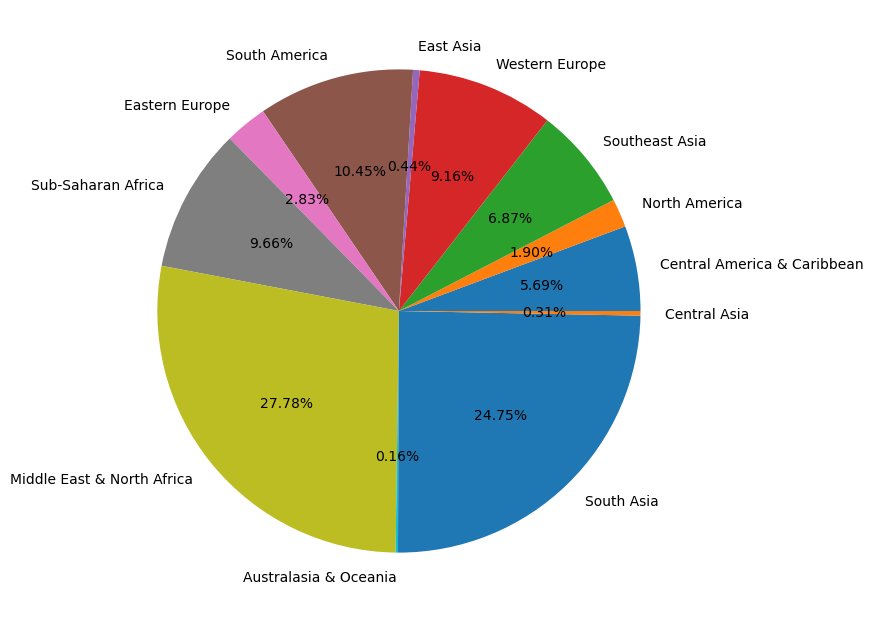

In [30]:
values = list(freq_region.values())
keys = list(freq_region.keys())
plt.figure(figsize=(8, 8),dpi=100)
plt.pie(values, labels = keys,autopct='%1.2f%%')

<BarContainer object of 12 artists>

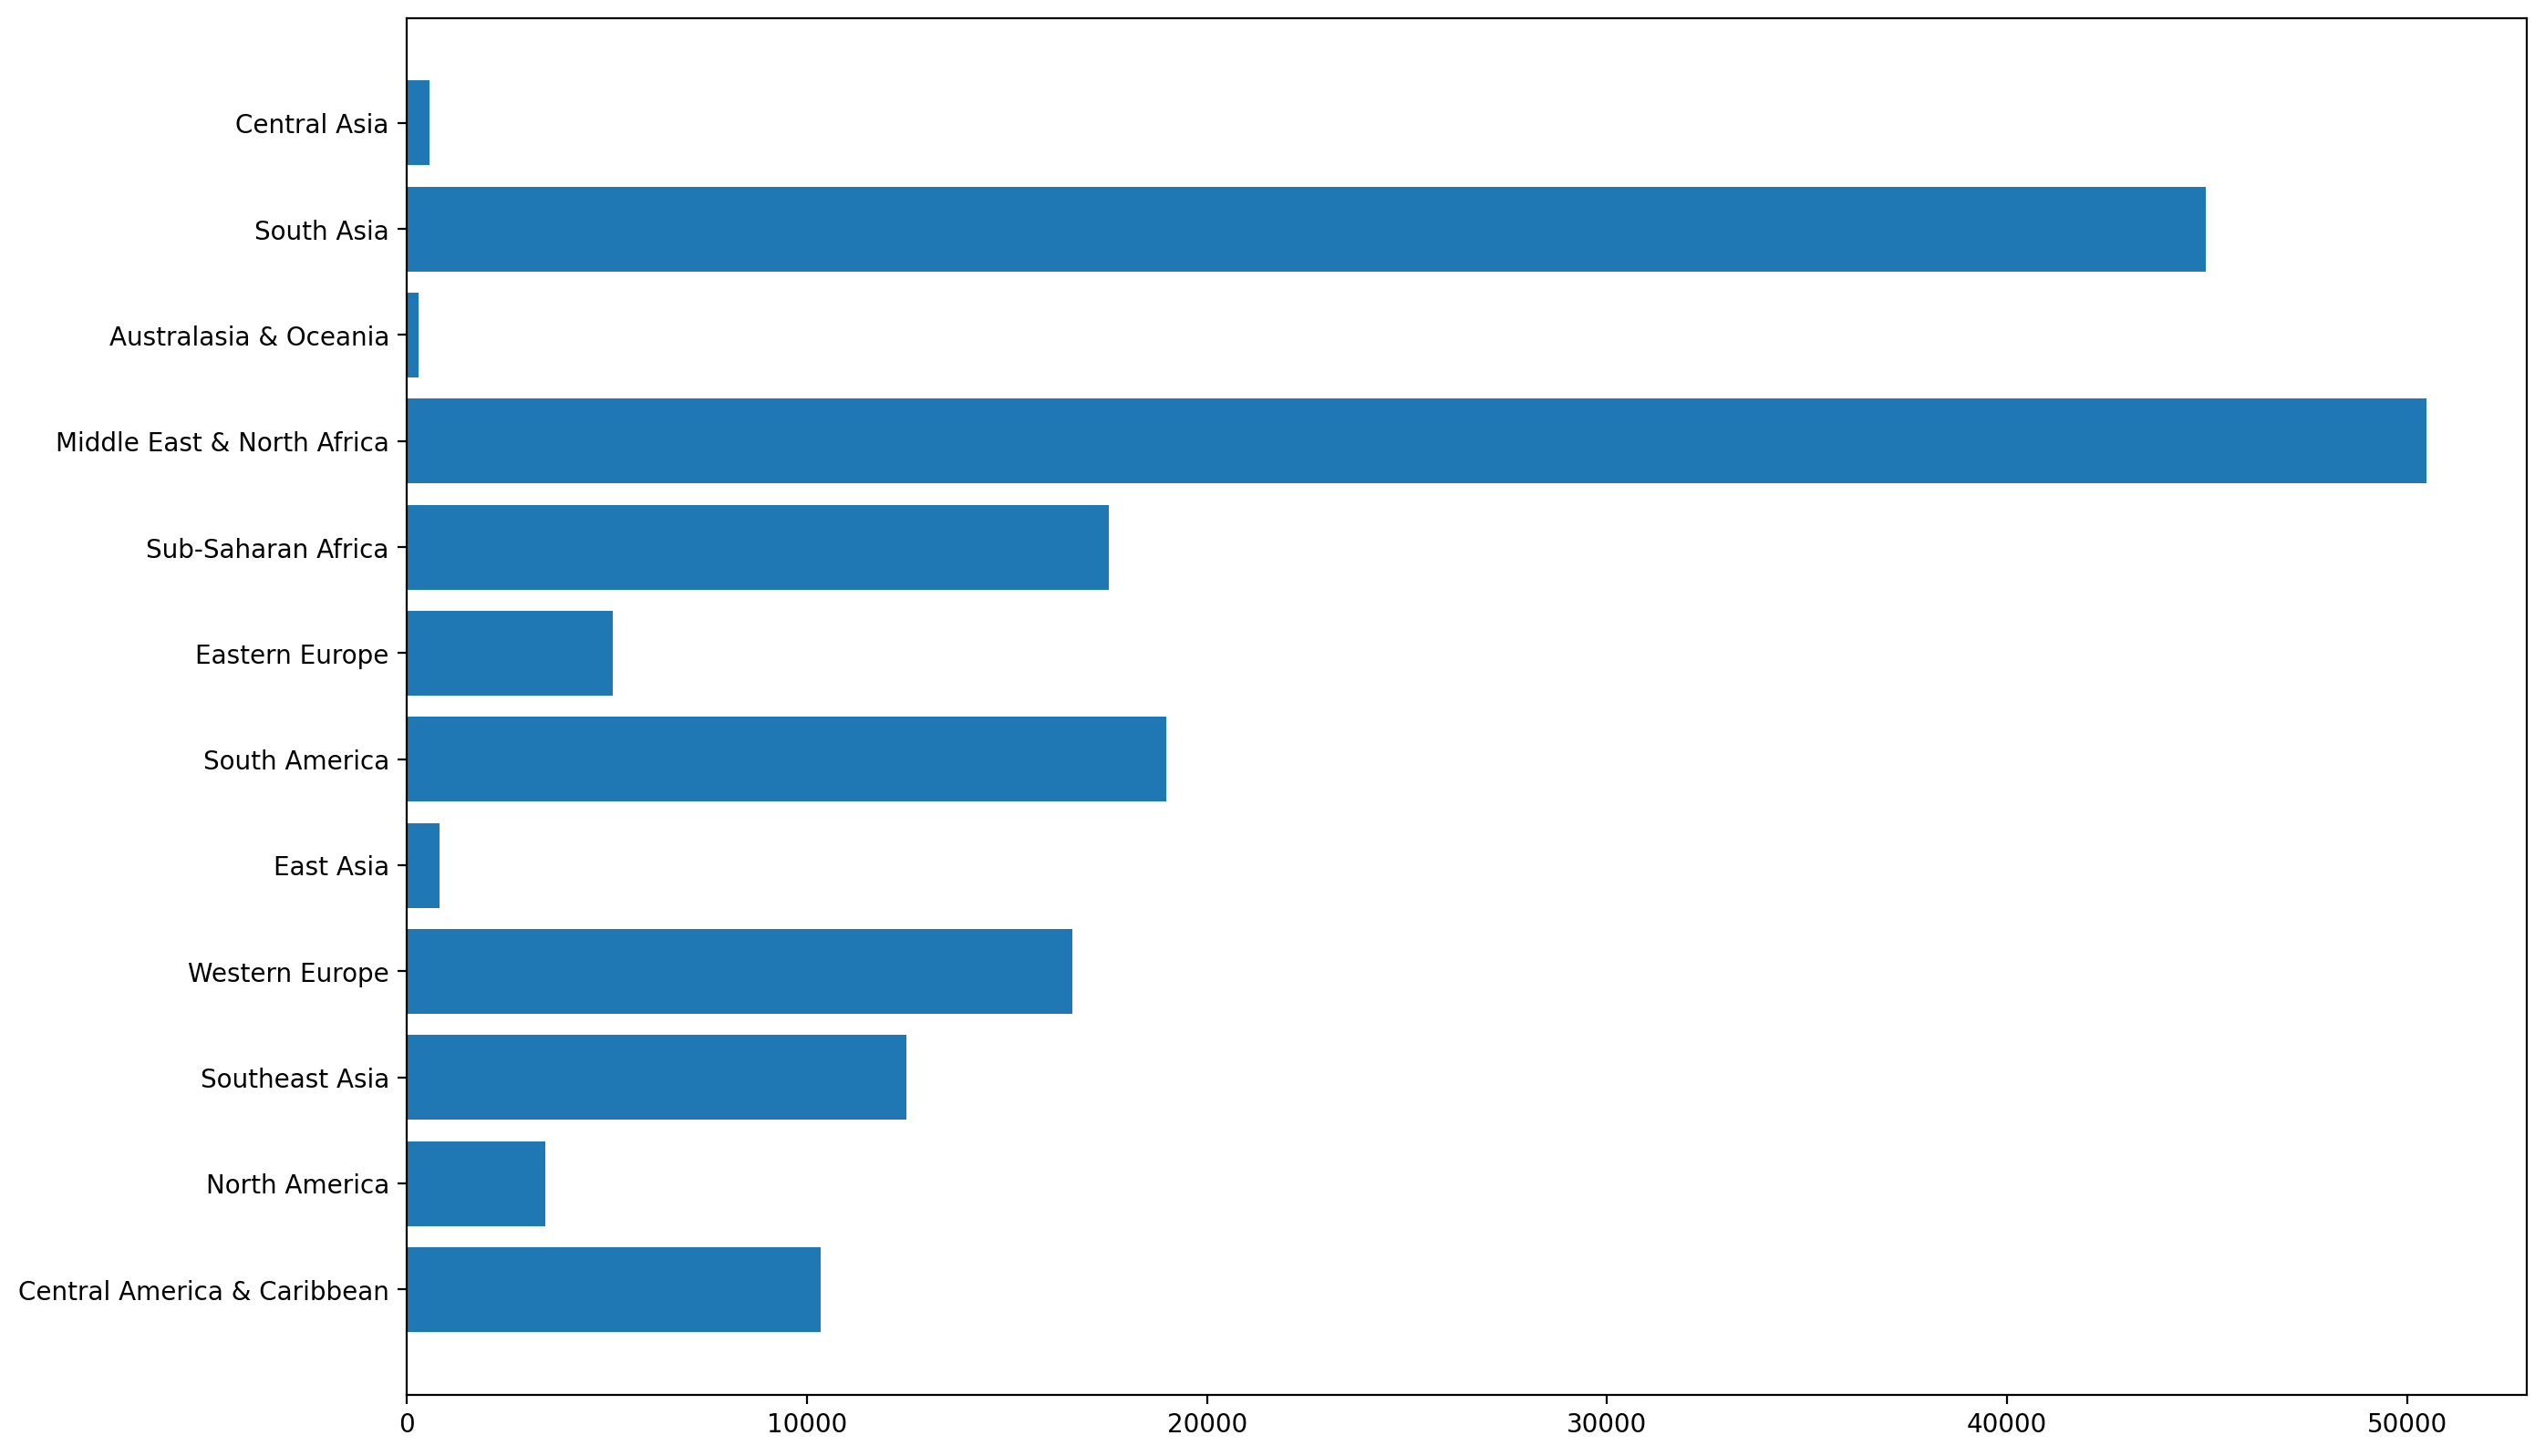

In [24]:
keys = freq_region.keys()
keys = list(keys)
values = freq_region.values()
values = list(values)
plt.figure(figsize=(15, 10),dpi=200)
plt.barh(keys, values)

The top two hottest regions are
1. Middle East & North Africa (having almost 50444 attacks from 1970-2017)
2. South Asia ( having almost 44824 attacks from 1970-2017)

In [6]:
print('The years are:')
print(df['iyear'].min(),'-',df['iyear'].max())

The years are:
1970 - 2017


Let's explore region by region.

### Middle East and North African Region

In [8]:
df_middle_east_north_africa = df_type1.loc[((df_type1['region_txt'] == 'Middle East & North Africa'))]

Text(0, 0.5, 'Total no. of incidents')

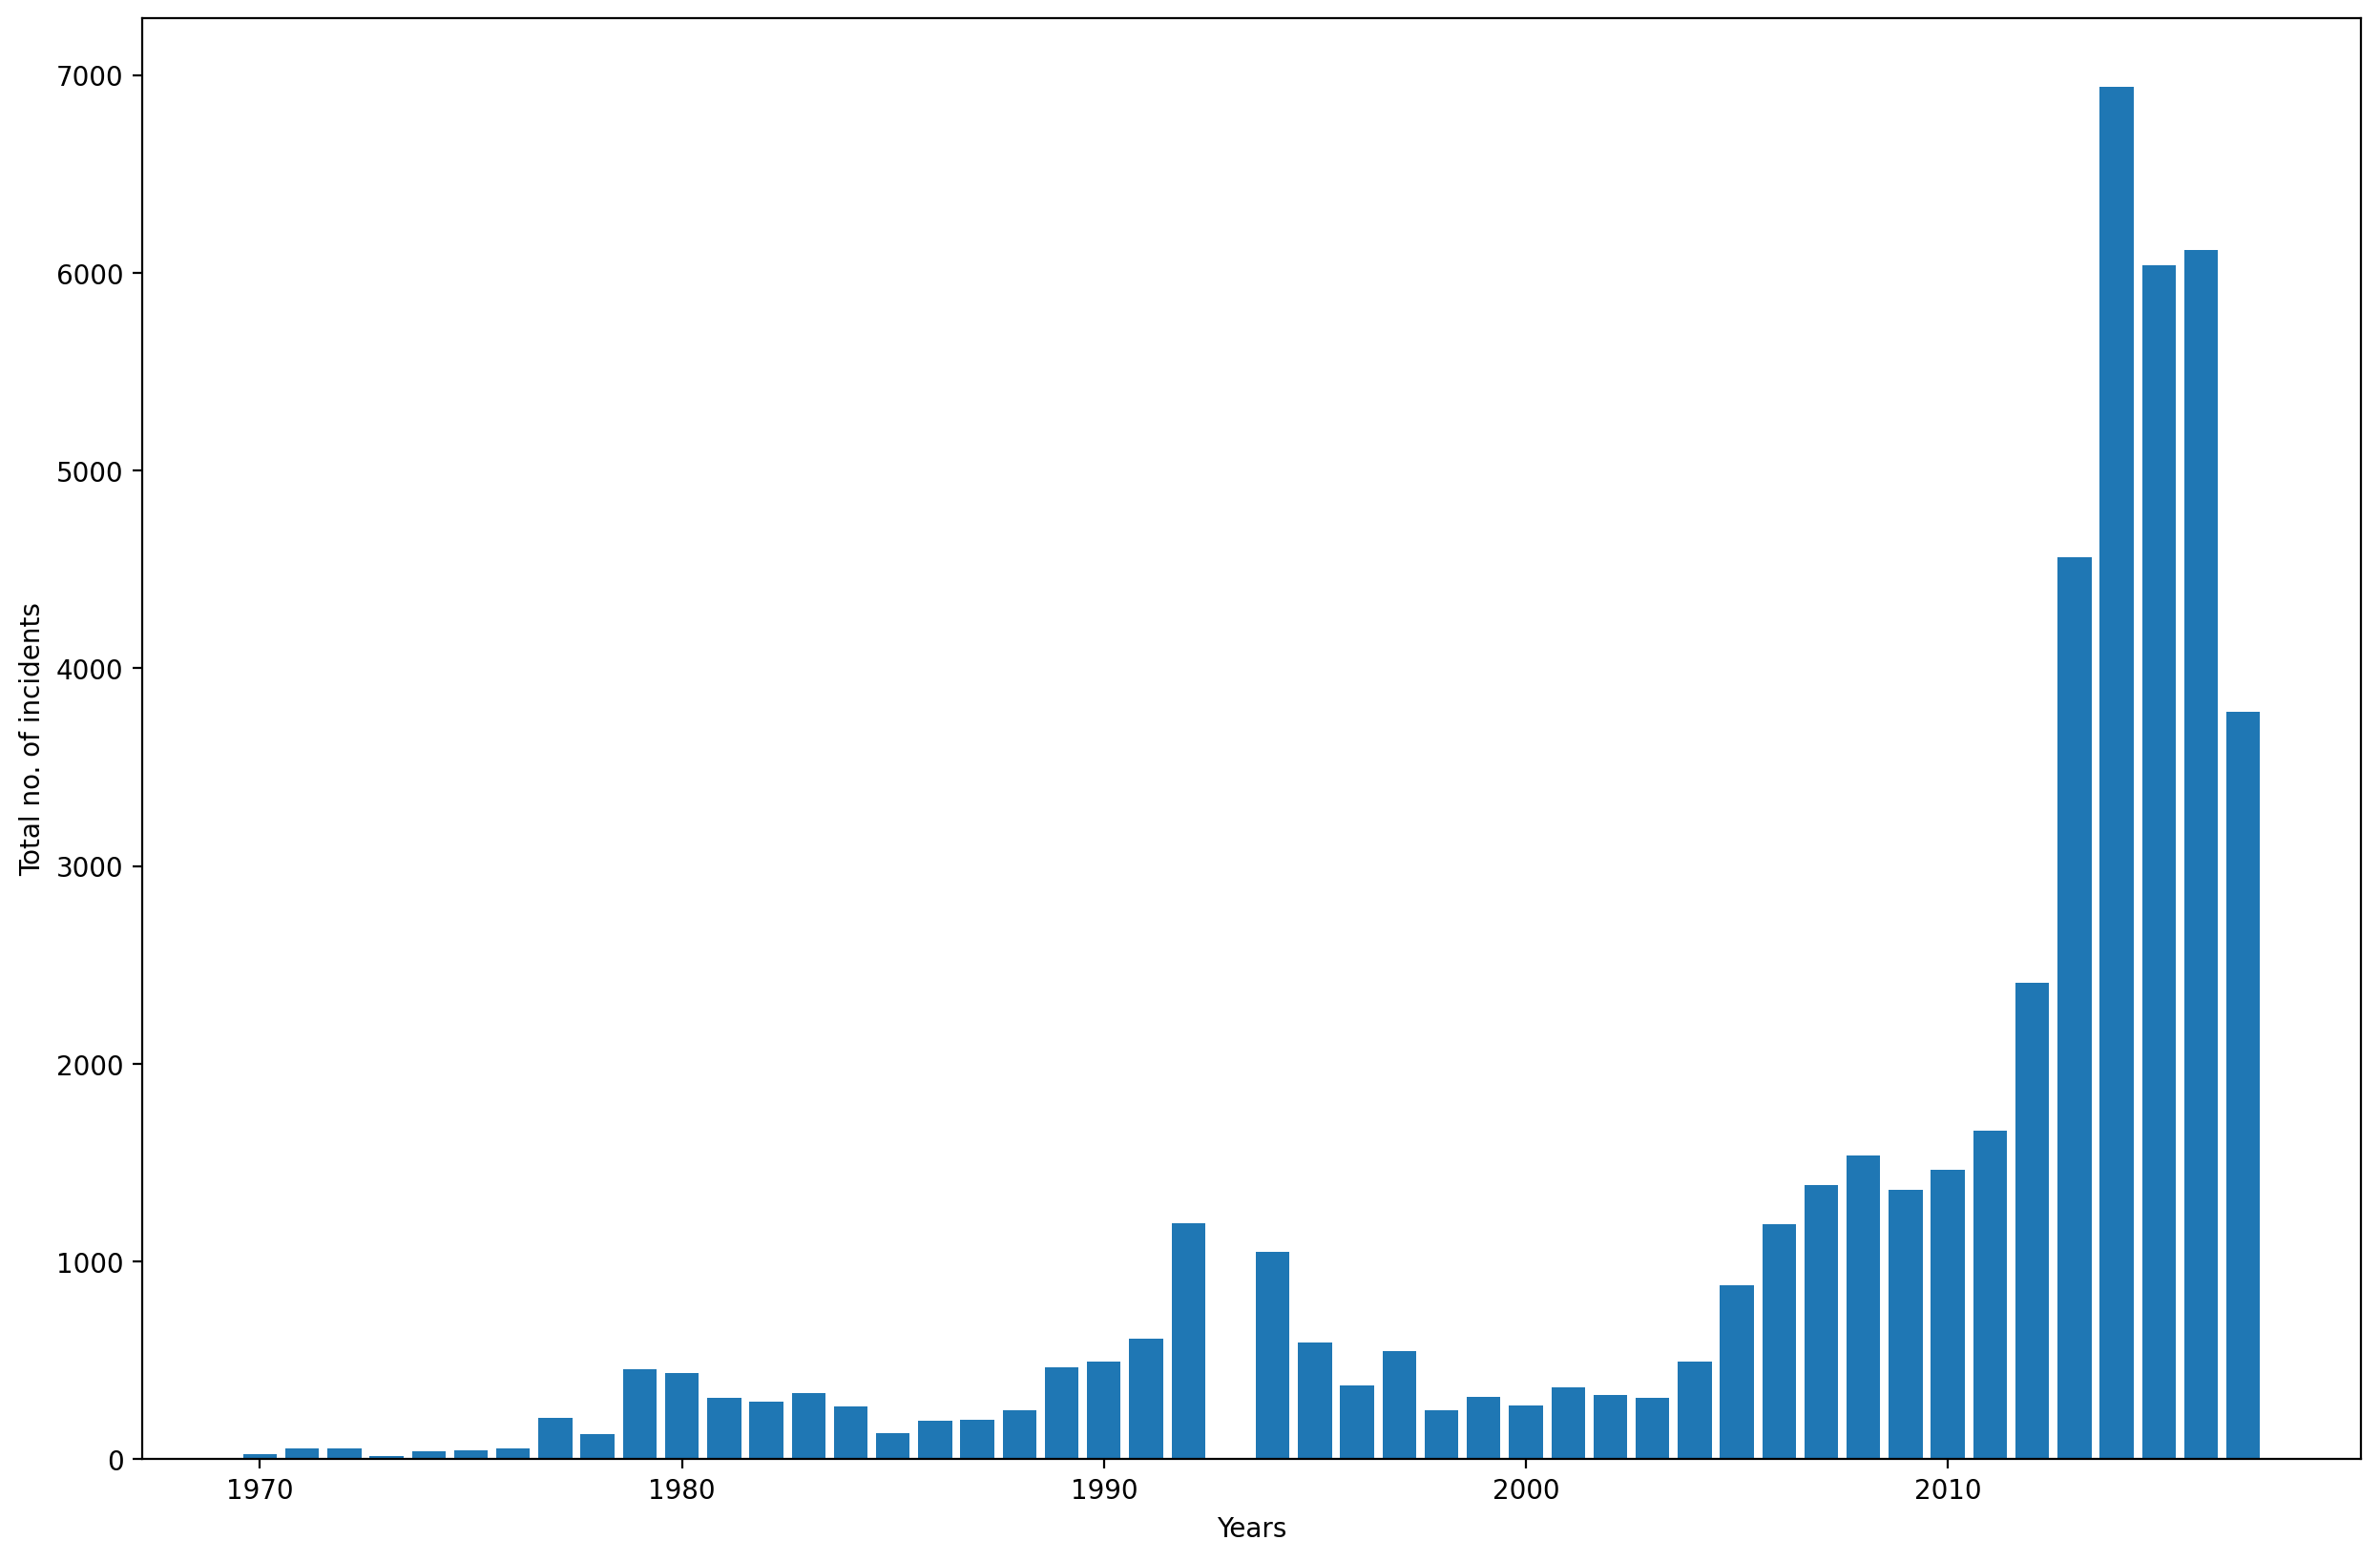

In [9]:
freq_year = {}
for i in df_middle_east_north_africa['iyear']:
    if i in freq_year:
        freq_year[i] +=1
    else:
        freq_year[i] = 1

keys = freq_year.keys()
#keys = list(keys)
values = freq_year.values()
#values = list(values)
plt.figure(figsize=(15, 10),dpi=200)
plt.bar(keys, values)
plt.xlabel('Years')
plt.ylabel('Total no. of incidents')

In [10]:
from operator import itemgetter
freq_country = {}
for i in df_middle_east_north_africa['country_txt']:
    if i in freq_country:
        freq_country[i] +=1
    else:
        freq_country[i] = 1

# getting top 15 countries
freq_country = dict(sorted(freq_country.items(), key = itemgetter(1), reverse = True)[:15])

Text(0.5, 1.0, 'Terrorism in countries from 1970-2017')

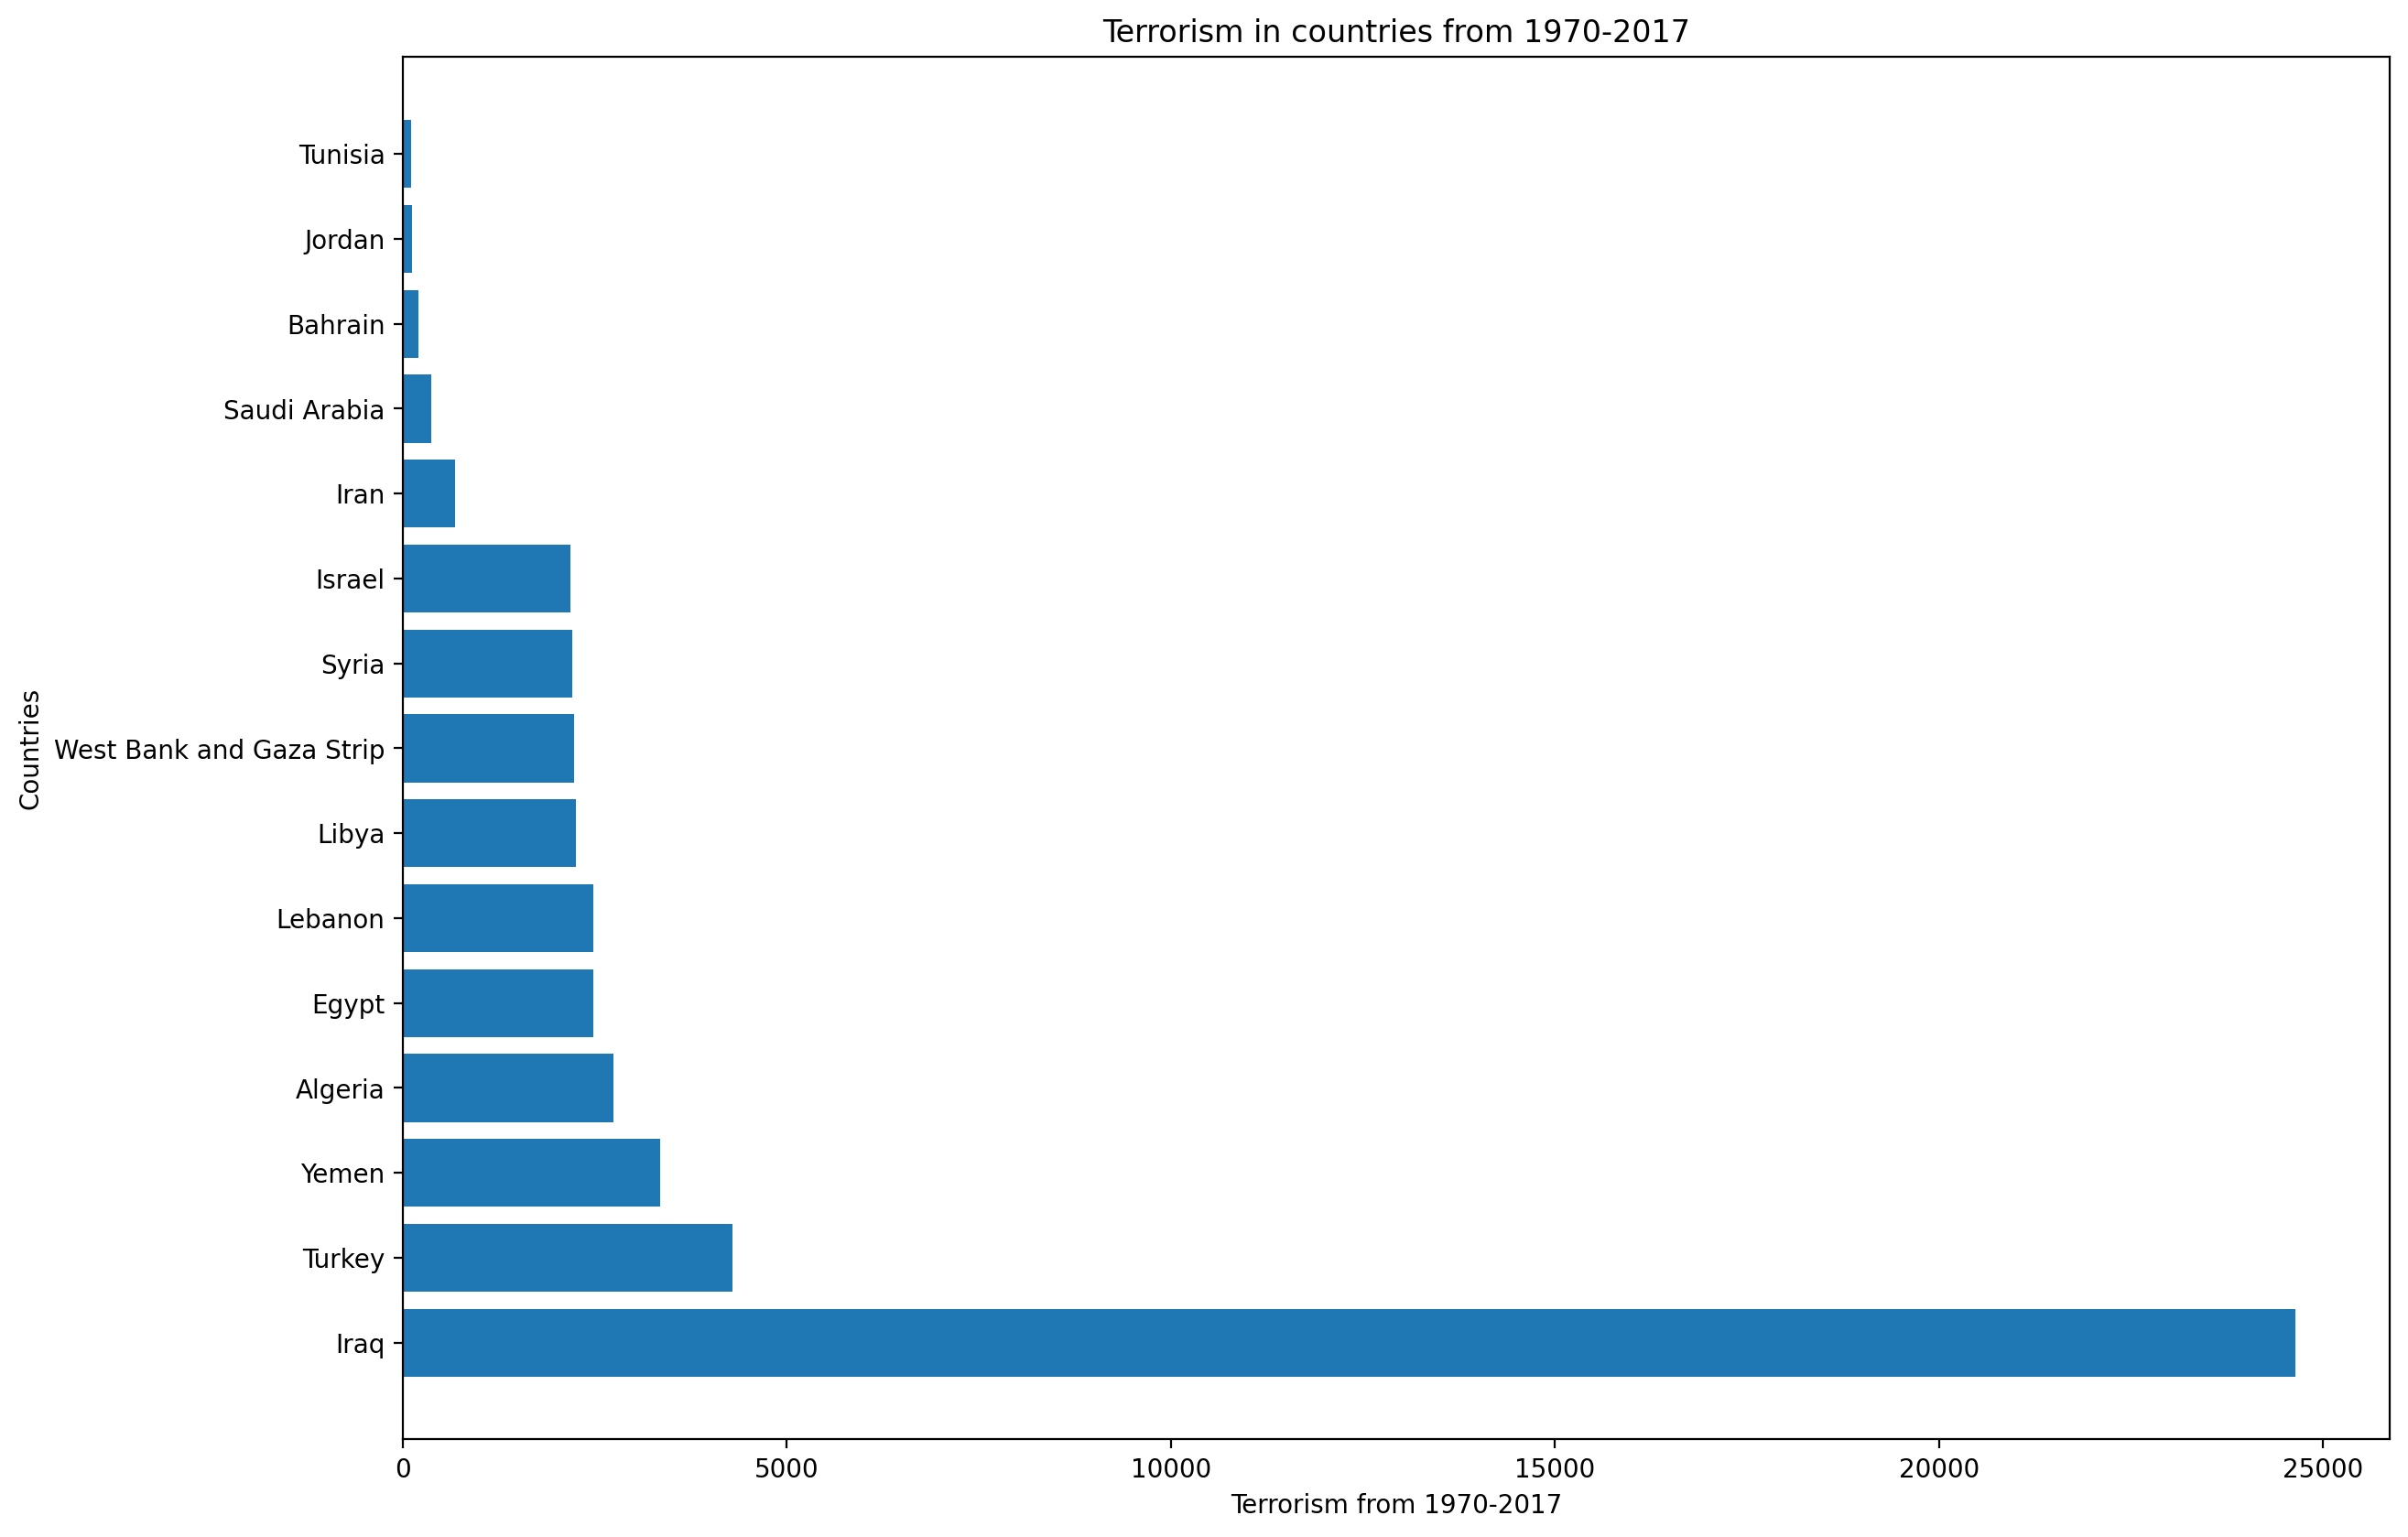

In [11]:
keys = freq_country.keys()
keys = list(keys)
values = freq_country.values()
values = list(values)
plt.figure(figsize=(14, 10),dpi=200)
plt.barh(keys, values)
plt.xlabel('Terrorism from 1970-2017')
plt.ylabel('Countries')
plt.title('Terrorism in countries from 1970-2017')

In middle east and north african region Iraq was the most hot terrorism point. Even turkey lands at second position, but still it has less than 5000 occurences of some terrorist attack whereas Iraq has approximately 25000 occurences. 

In [12]:
# hottest country in middle east and north american region is Iraq

#getting Iraq info
df_iraq_info = df_middle_east_north_africa.loc[((df_type1['country_txt'] == 'Iraq'))]

Text(0, 0.5, 'Cities of Iraq')

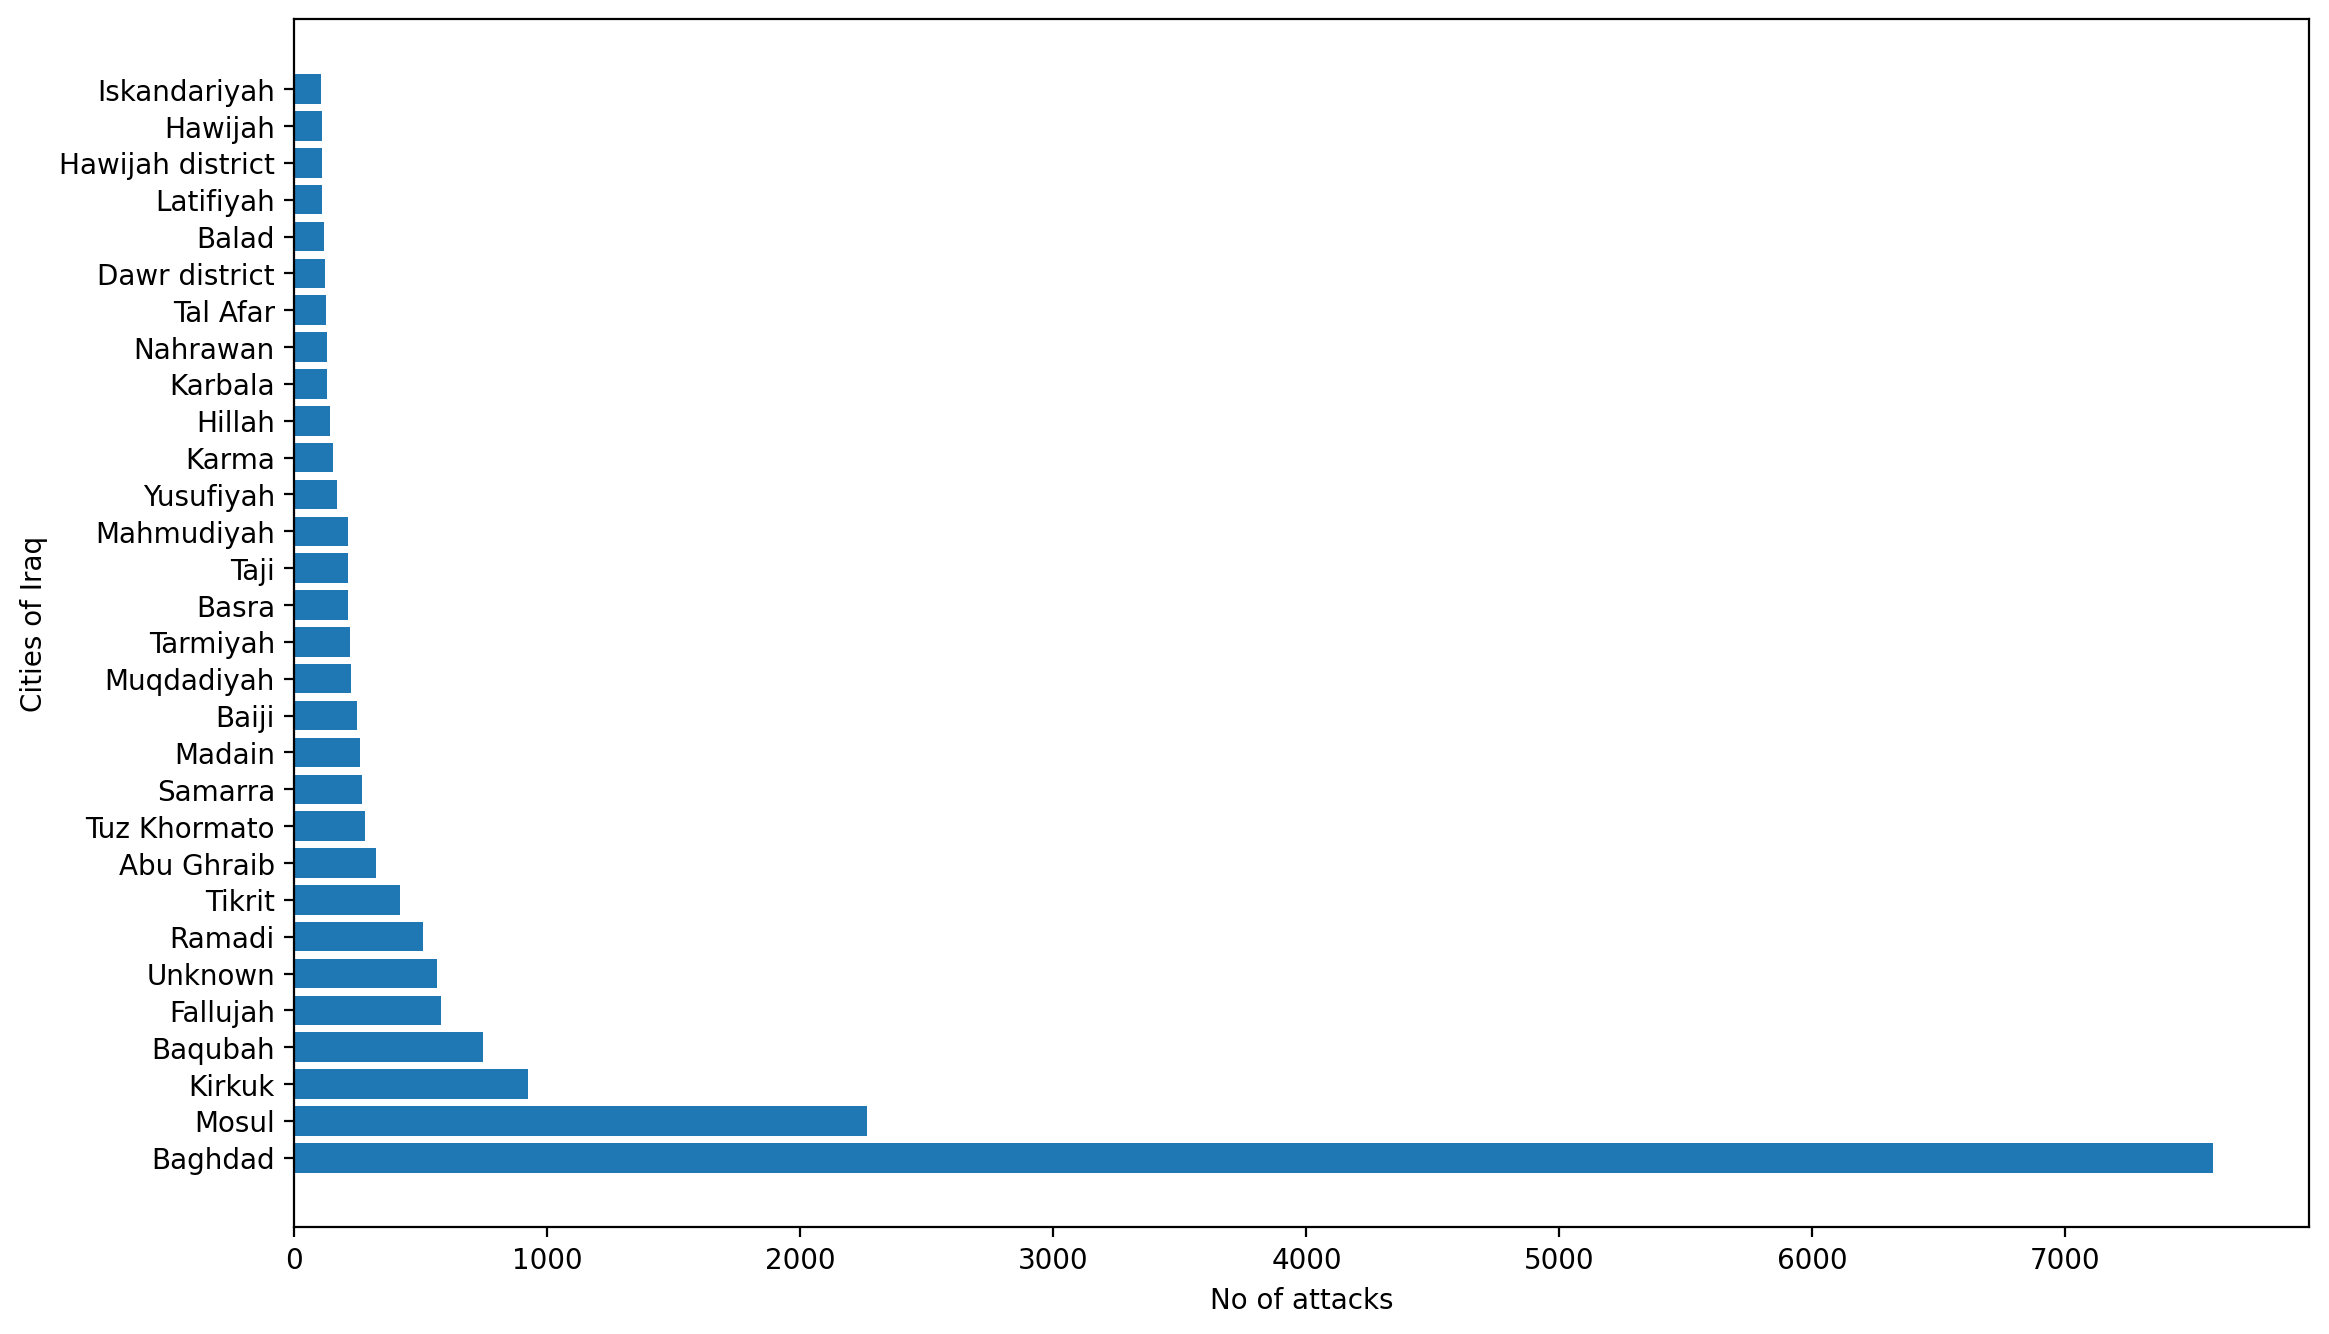

In [13]:
freq_city_iraq = {}
for i in df_iraq_info['city']:
    if i in freq_city_iraq:
        freq_city_iraq[i] +=1
    else:
        freq_city_iraq[i] = 1

freq_city_iraq = dict(sorted(freq_city_iraq.items(), key = itemgetter(1), reverse = True)[:30])
keys = freq_city_iraq.keys()
keys = list(keys)
values = freq_city_iraq.values()
values = list(values)
plt.figure(figsize=(13, 8),dpi=200)
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Cities of Iraq')

The most effected city is baghdad with more than 7000 attacks.

Text(0, 0.5, 'Attack Types')

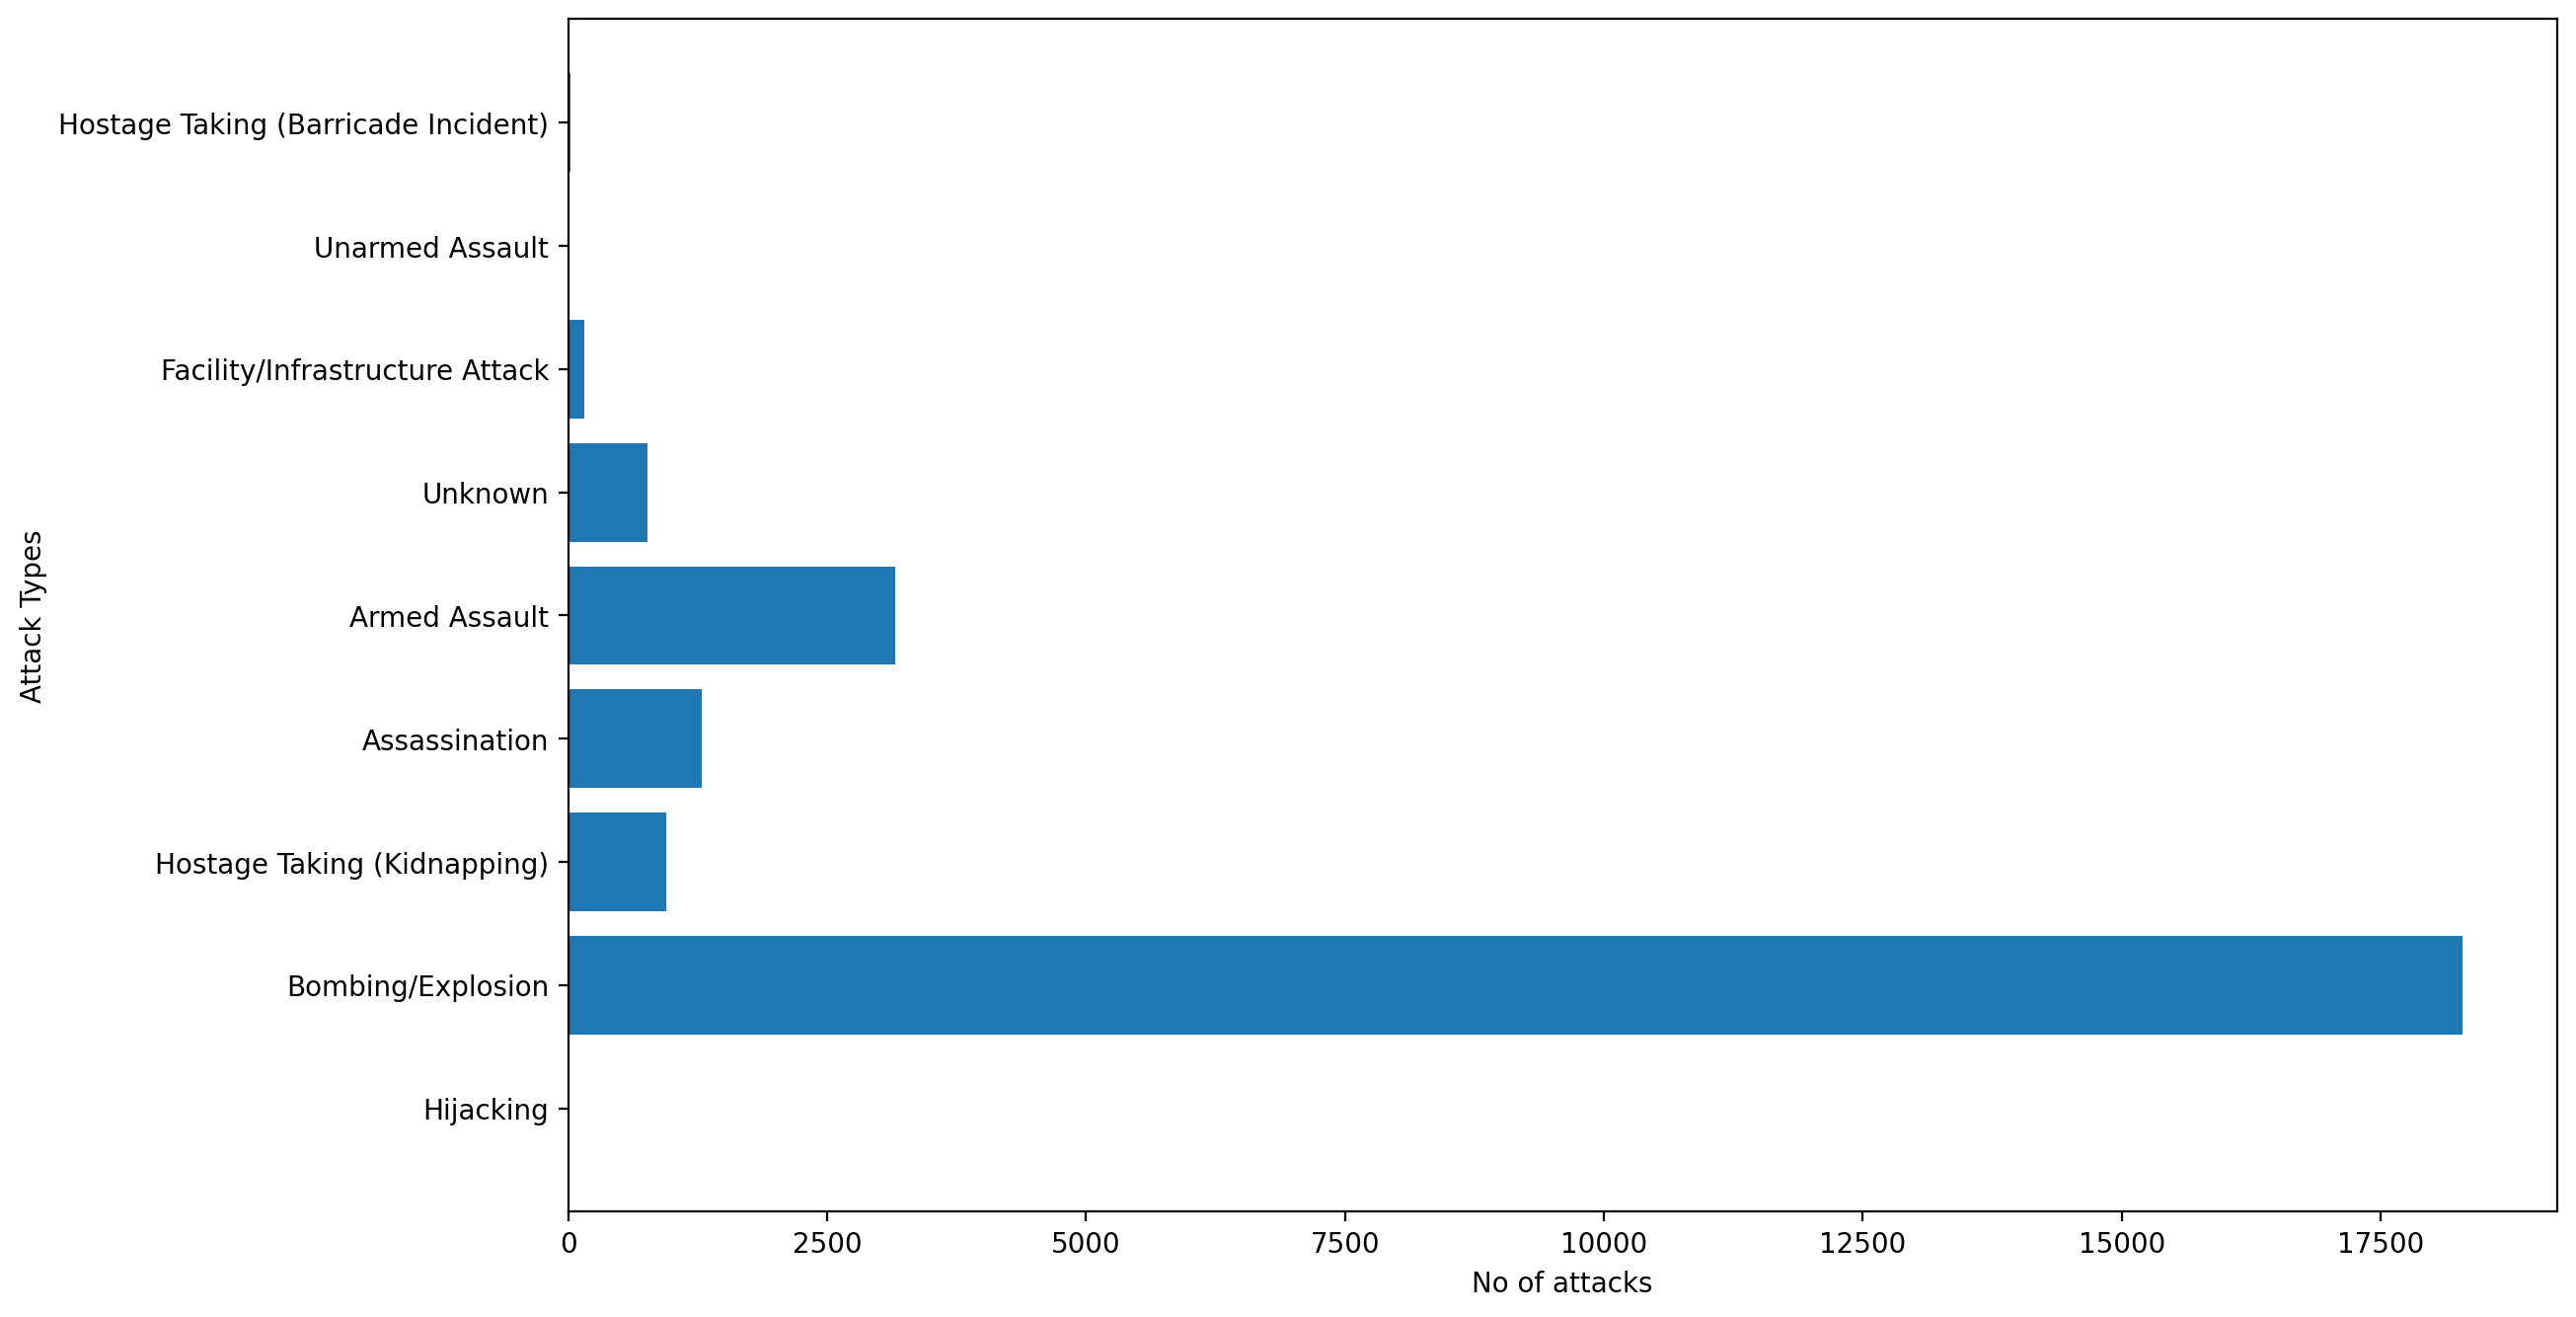

In [14]:
freq_attatcks_iraq = {}
for i in df_iraq_info['attacktype1_txt']:
    if i in freq_attatcks_iraq:
        freq_attatcks_iraq[i] +=1
    else:
        freq_attatcks_iraq[i] = 1

keys = freq_attatcks_iraq.keys()
keys = list(keys)
values = freq_attatcks_iraq.values()
values = list(values)
plt.figure(figsize=(13, 8),dpi=200)
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Attack Types')

Text(0, 0.5, 'Targets')

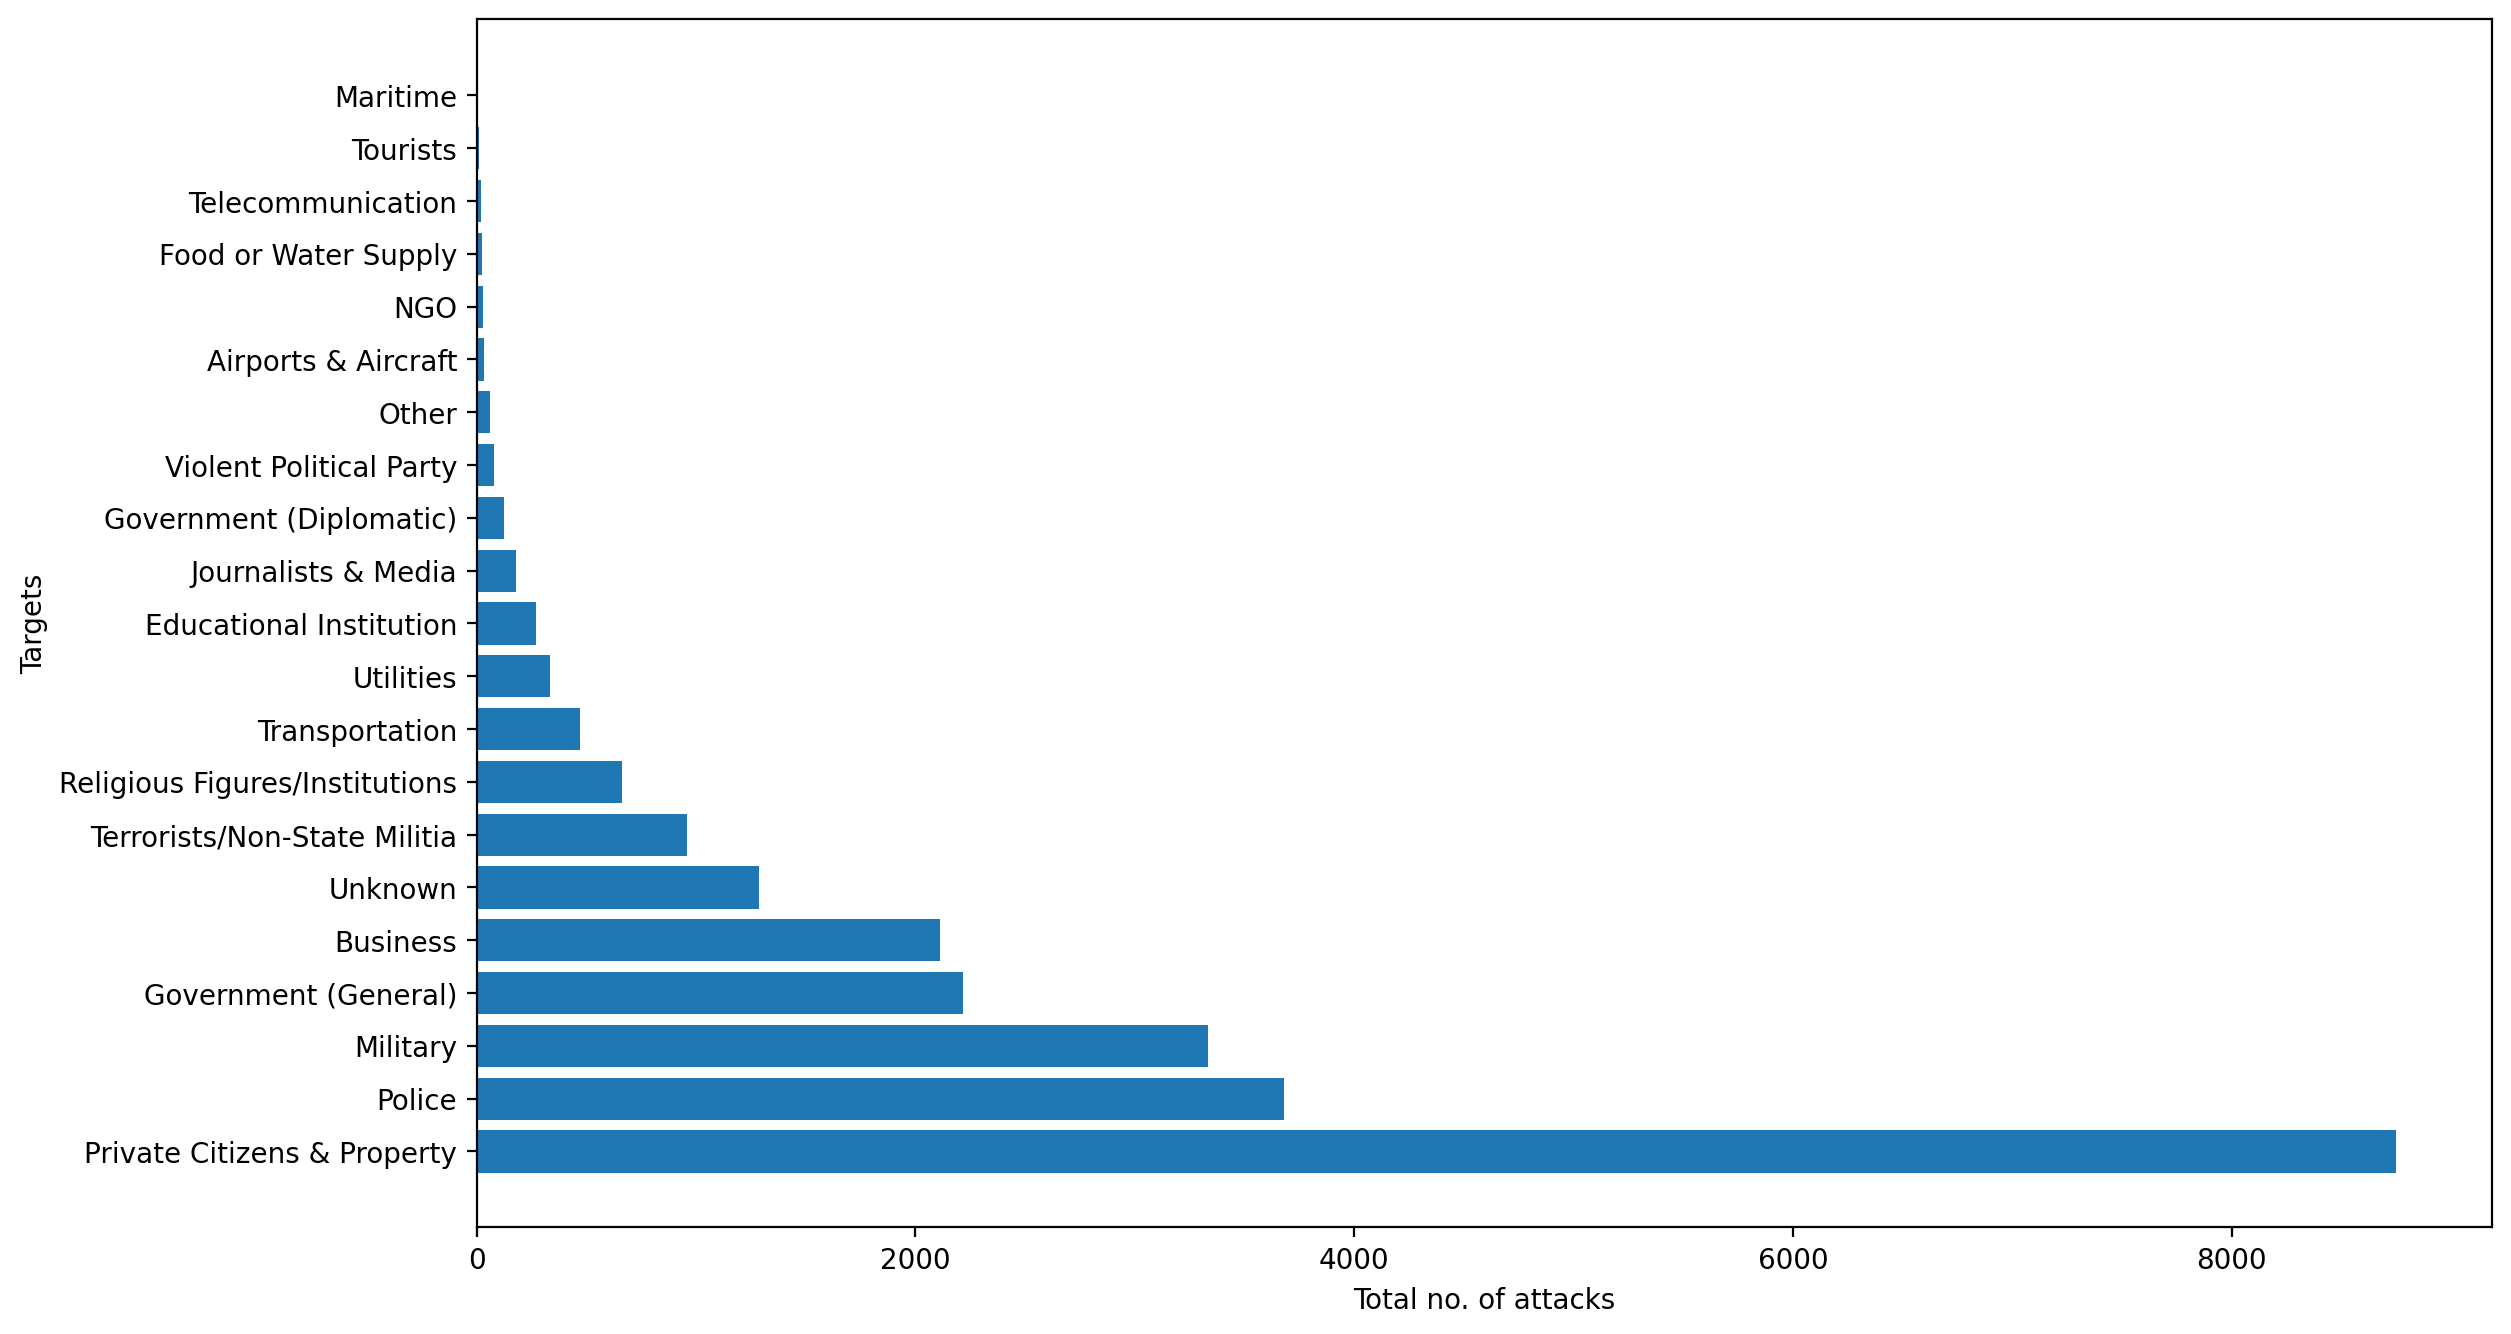

In [16]:
freq_targets_iraq = {}
for i in df_iraq_info['targtype1_txt']:
    if i in freq_targets_iraq:
        freq_targets_iraq[i] +=1
    else:
        freq_targets_iraq[i] = 1

freq_targets_iraq = dict(sorted(freq_targets_iraq.items(), key = itemgetter(1), reverse = True))

keys = freq_targets_iraq.keys()
keys = list(keys)
values = freq_targets_iraq.values()
values = list(values)
plt.figure(figsize=(13, 8),dpi=200)
plt.barh(keys, values)
plt.xlabel('Total no. of attacks')
plt.ylabel('Targets')

Text(0.5, 1.0, 'Types of weapons')

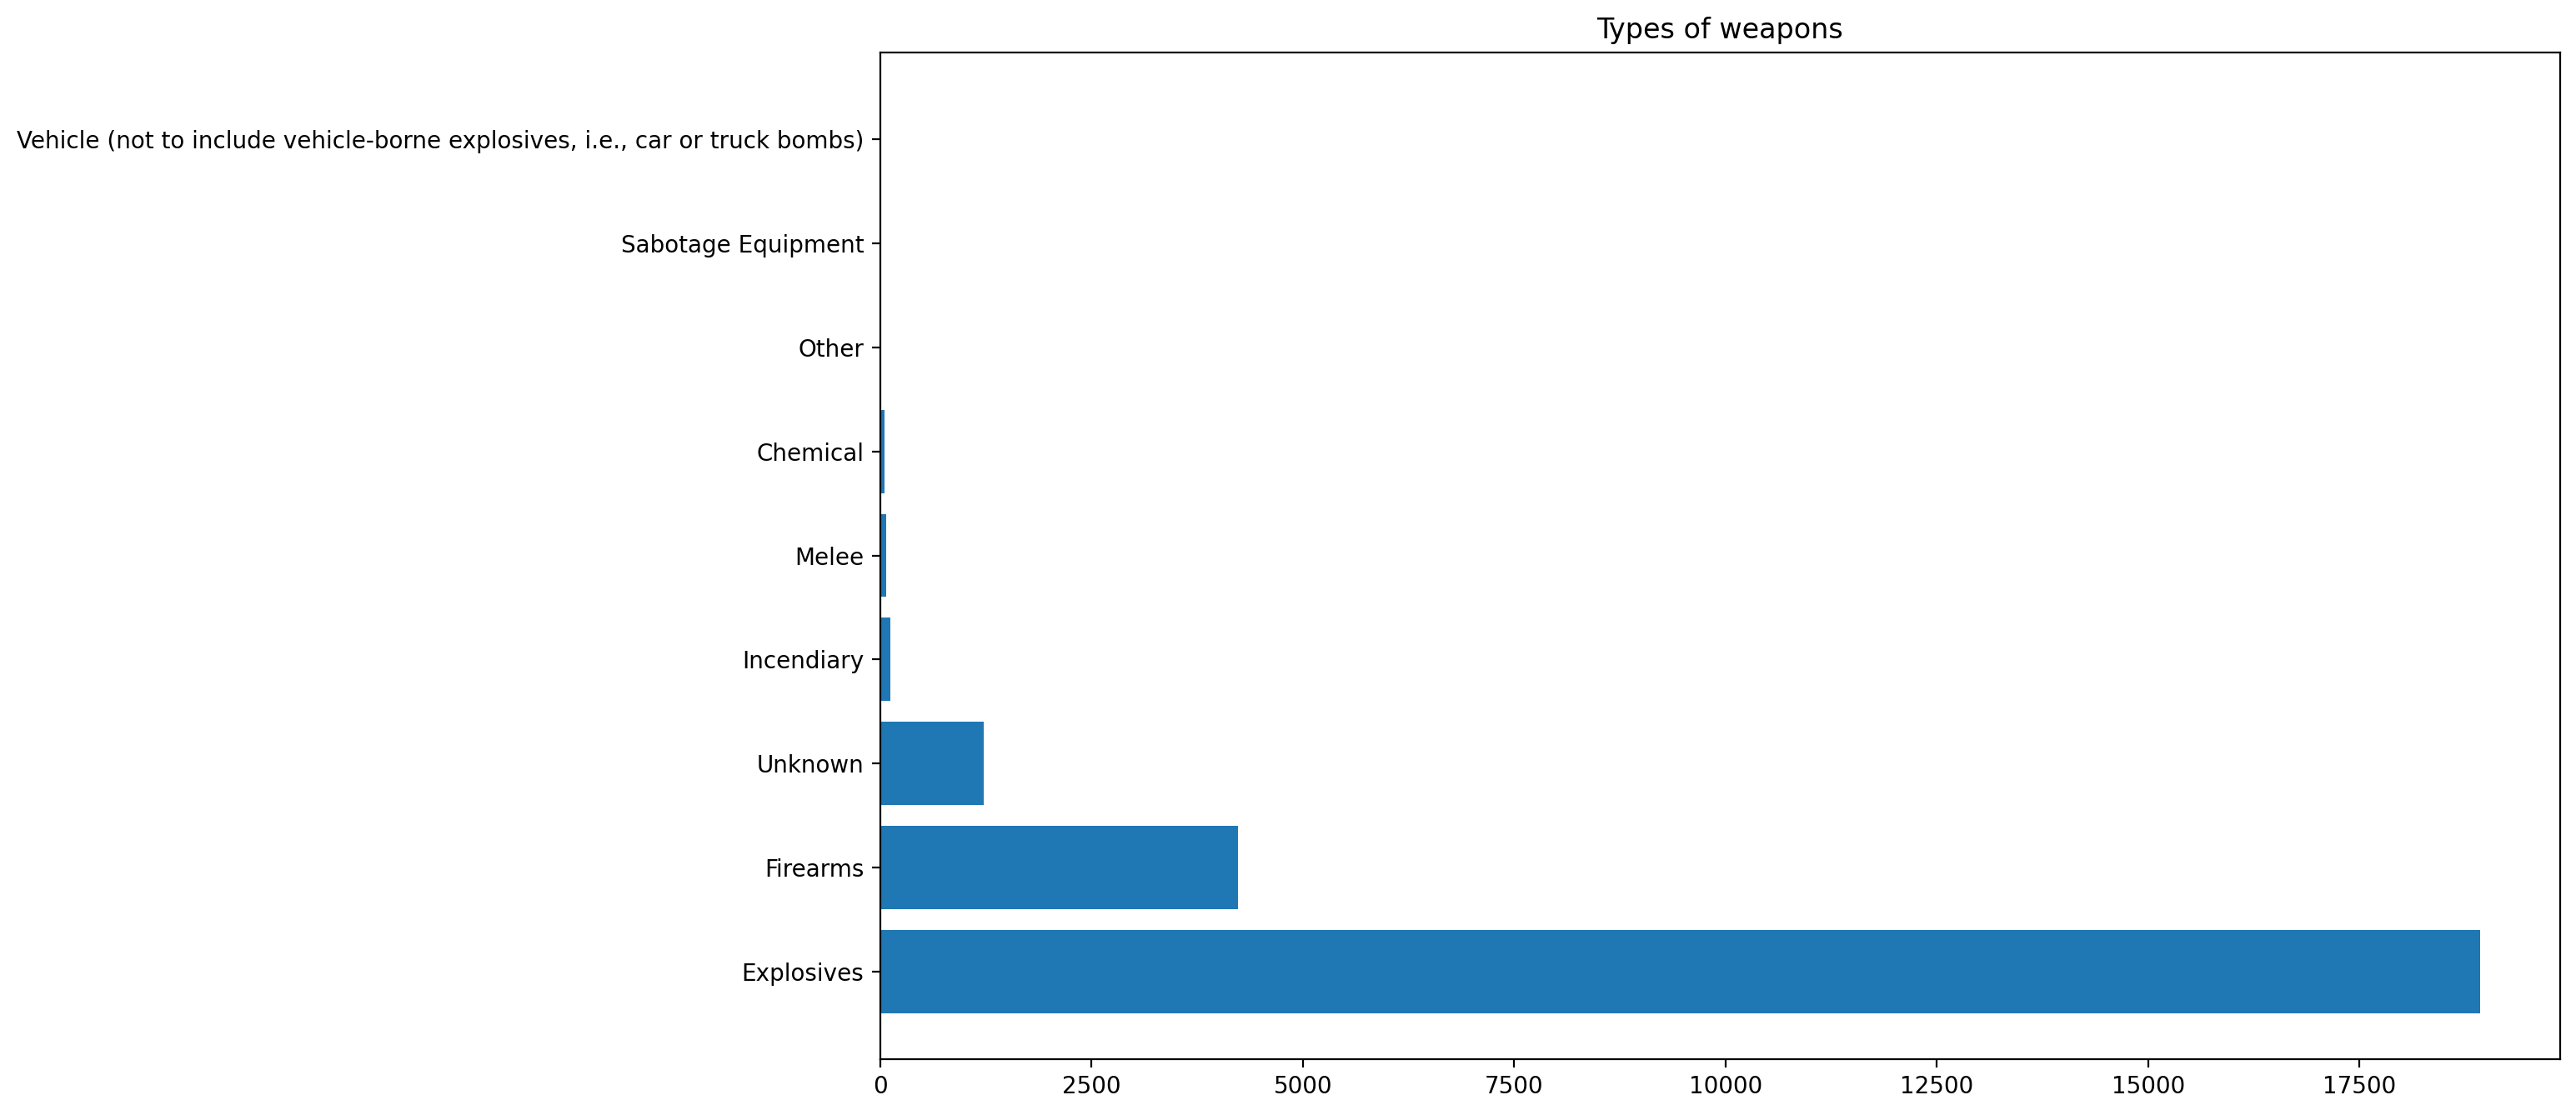

In [17]:
freq_weaptype1_iraq = {}
for i in df_iraq_info['weaptype1_txt']:
    if i in freq_weaptype1_iraq:
        freq_weaptype1_iraq[i] +=1
    else:
        freq_weaptype1_iraq[i] = 1

freq_weaptype1_iraq = dict(sorted(freq_weaptype1_iraq.items(), key = itemgetter(1), reverse = True))

keys = freq_weaptype1_iraq.keys()
keys = list(keys)
values = freq_weaptype1_iraq.values()
values = list(values)
plt.figure(figsize=(13, 8),dpi=200)
plt.barh(keys, values)
plt.title('Types of weapons')

Text(0, 0.5, 'No. of Attacks')

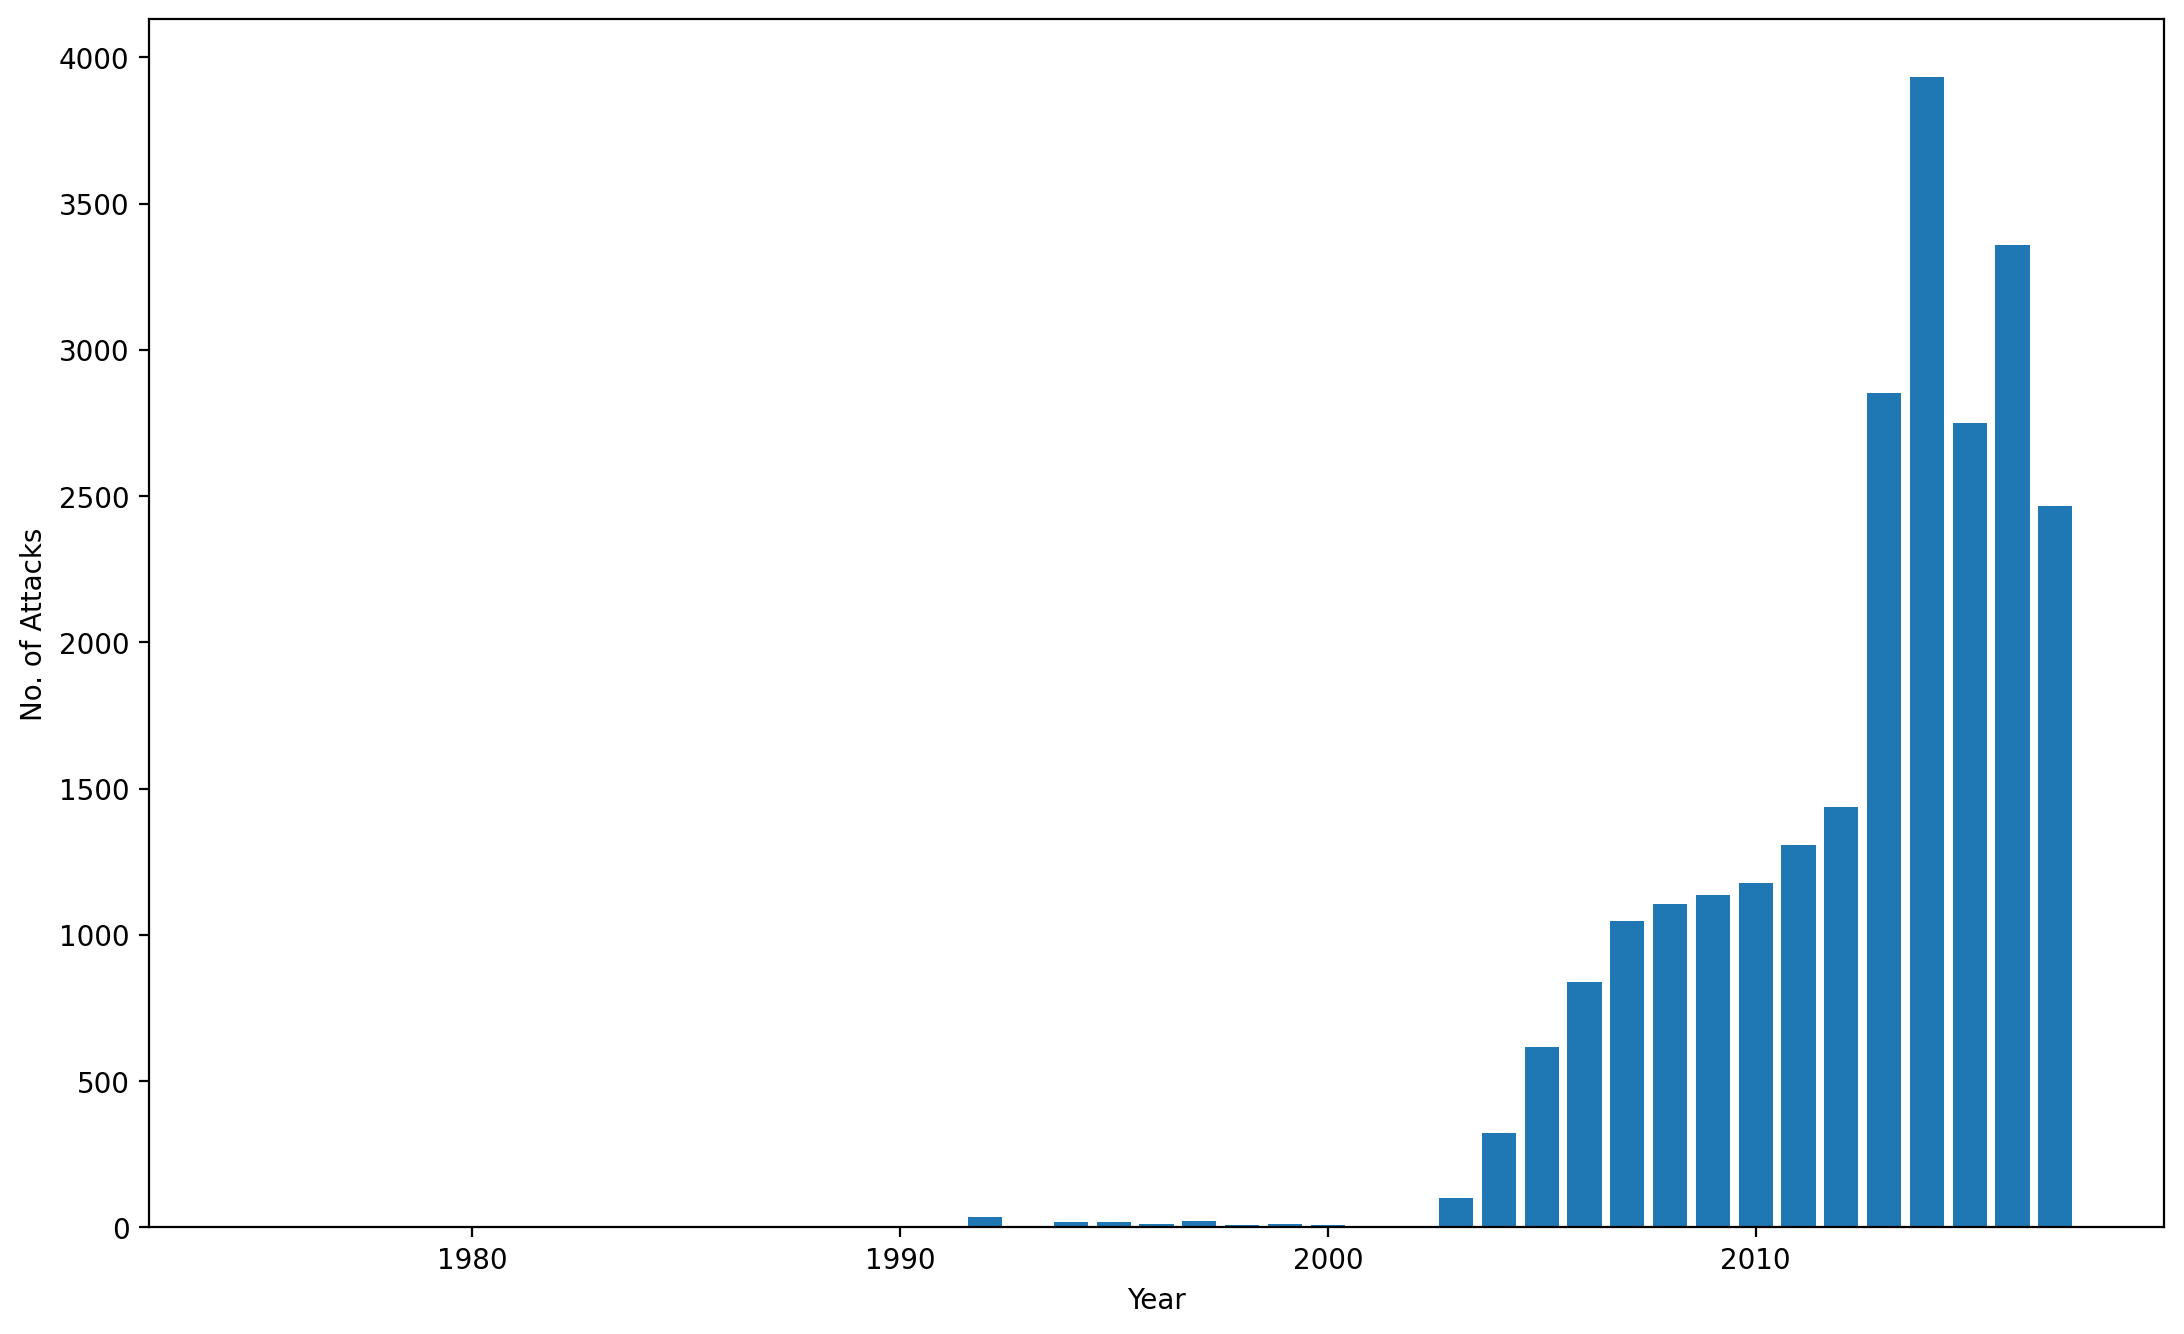

In [18]:
freq_iyear = {}
for i in df_iraq_info['iyear']:
    if i in freq_iyear:
        freq_iyear[i] +=1
    else:
        freq_iyear[i] = 1
        
keys = freq_iyear.keys()
keys = list(keys)
values = freq_iyear.values()
values = list(values)
plt.figure(figsize=(13, 8),dpi=200)
plt.bar(keys, values)
plt.xlabel('Year')
plt.ylabel('No. of Attacks')

In [19]:
freq_success = {}
for i in df_iraq_info['success']:
    if i in freq_success:
        freq_success[i] +=1
    else:
        freq_success[i] = 1

print('The total success and failed attacks are:')
print(freq_success)
freq_suicide = {}
for i in df_iraq_info['suicide']:
    if i in freq_suicide:
        freq_suicide[i] +=1
    else:
        freq_suicide[i] = 1

print('The suicide attempts are:')
print(freq_suicide)

The total success and failed attacks are:
{1: 21861, 0: 2775}
The suicide attempts are:
{0: 22034, 1: 2602}


### Findings

1. In Middle east and North African region the most effect city of terrorism is Iraq.
2. The most effected city of Iraq is Baghdad.
3. Weapon types used for the attack is explosives (17500+ occurences) followed by firearms(approximately 5000 occurences).
4. Most of attack typs were bombing and explosion and the targets were private citizens and property.
5. The attacks intensified after 2000 and were at peak in 2014.

So, in Middle East and North American region the hot zone is Iraq.

### South Asia

In [20]:
df_south_asia = df_type1.loc[((df_type1['region_txt'] == 'South Asia'))]

In [21]:
df_south_asia.head(5)

,iyear,country,country_txt,region,region_txt,city,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,weaptype1,weaptype1_txt
585,1970,153,Pakistan,6,South Asia,Karachi,1,0,1,Assassination,7,Government (Diplomatic),10,Vehicle (not to include vehicle-borne explosiv...
1186,1972,92,India,6,South Asia,New Delhi,1,0,4,Hijacking,6,Airports & Aircraft,6,Explosives
1863,1973,4,Afghanistan,6,South Asia,Kabul,0,0,9,Unknown,6,Airports & Aircraft,13,Unknown
2217,1974,153,Pakistan,6,South Asia,Karachi,1,0,3,Bombing/Explosion,11,Maritime,5,Firearms
2705,1974,153,Pakistan,6,South Asia,Peshawar,1,0,3,Bombing/Explosion,7,Government (Diplomatic),6,Explosives


<BarContainer object of 9 artists>

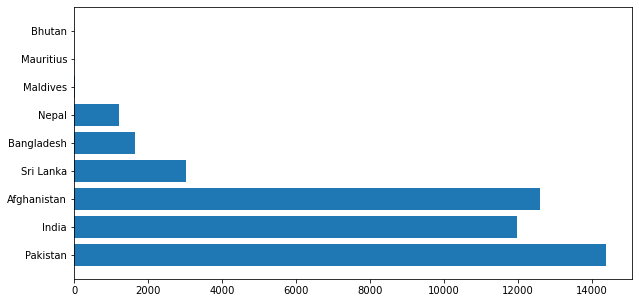

In [29]:
freq_country = {}
for i in df_south_asia['country_txt']:
    if i in freq_country:
        freq_country[i] +=1
    else:
        freq_country[i] = 1
        
keys = freq_country.keys()
keys = list(keys)
values = freq_country.values()
values = list(values)
plt.figure(figsize=(10, 5))
plt.barh(keys, values)

#### Top countries
Top three countries in south asia are:
1. Pakistan
2. India
3. Afganistan

In [22]:
df_pakistan = df_type1.loc[((df_type1['country_txt'] == 'Pakistan'))] # getting Pakistan

Text(0, 0.5, 'Cities')

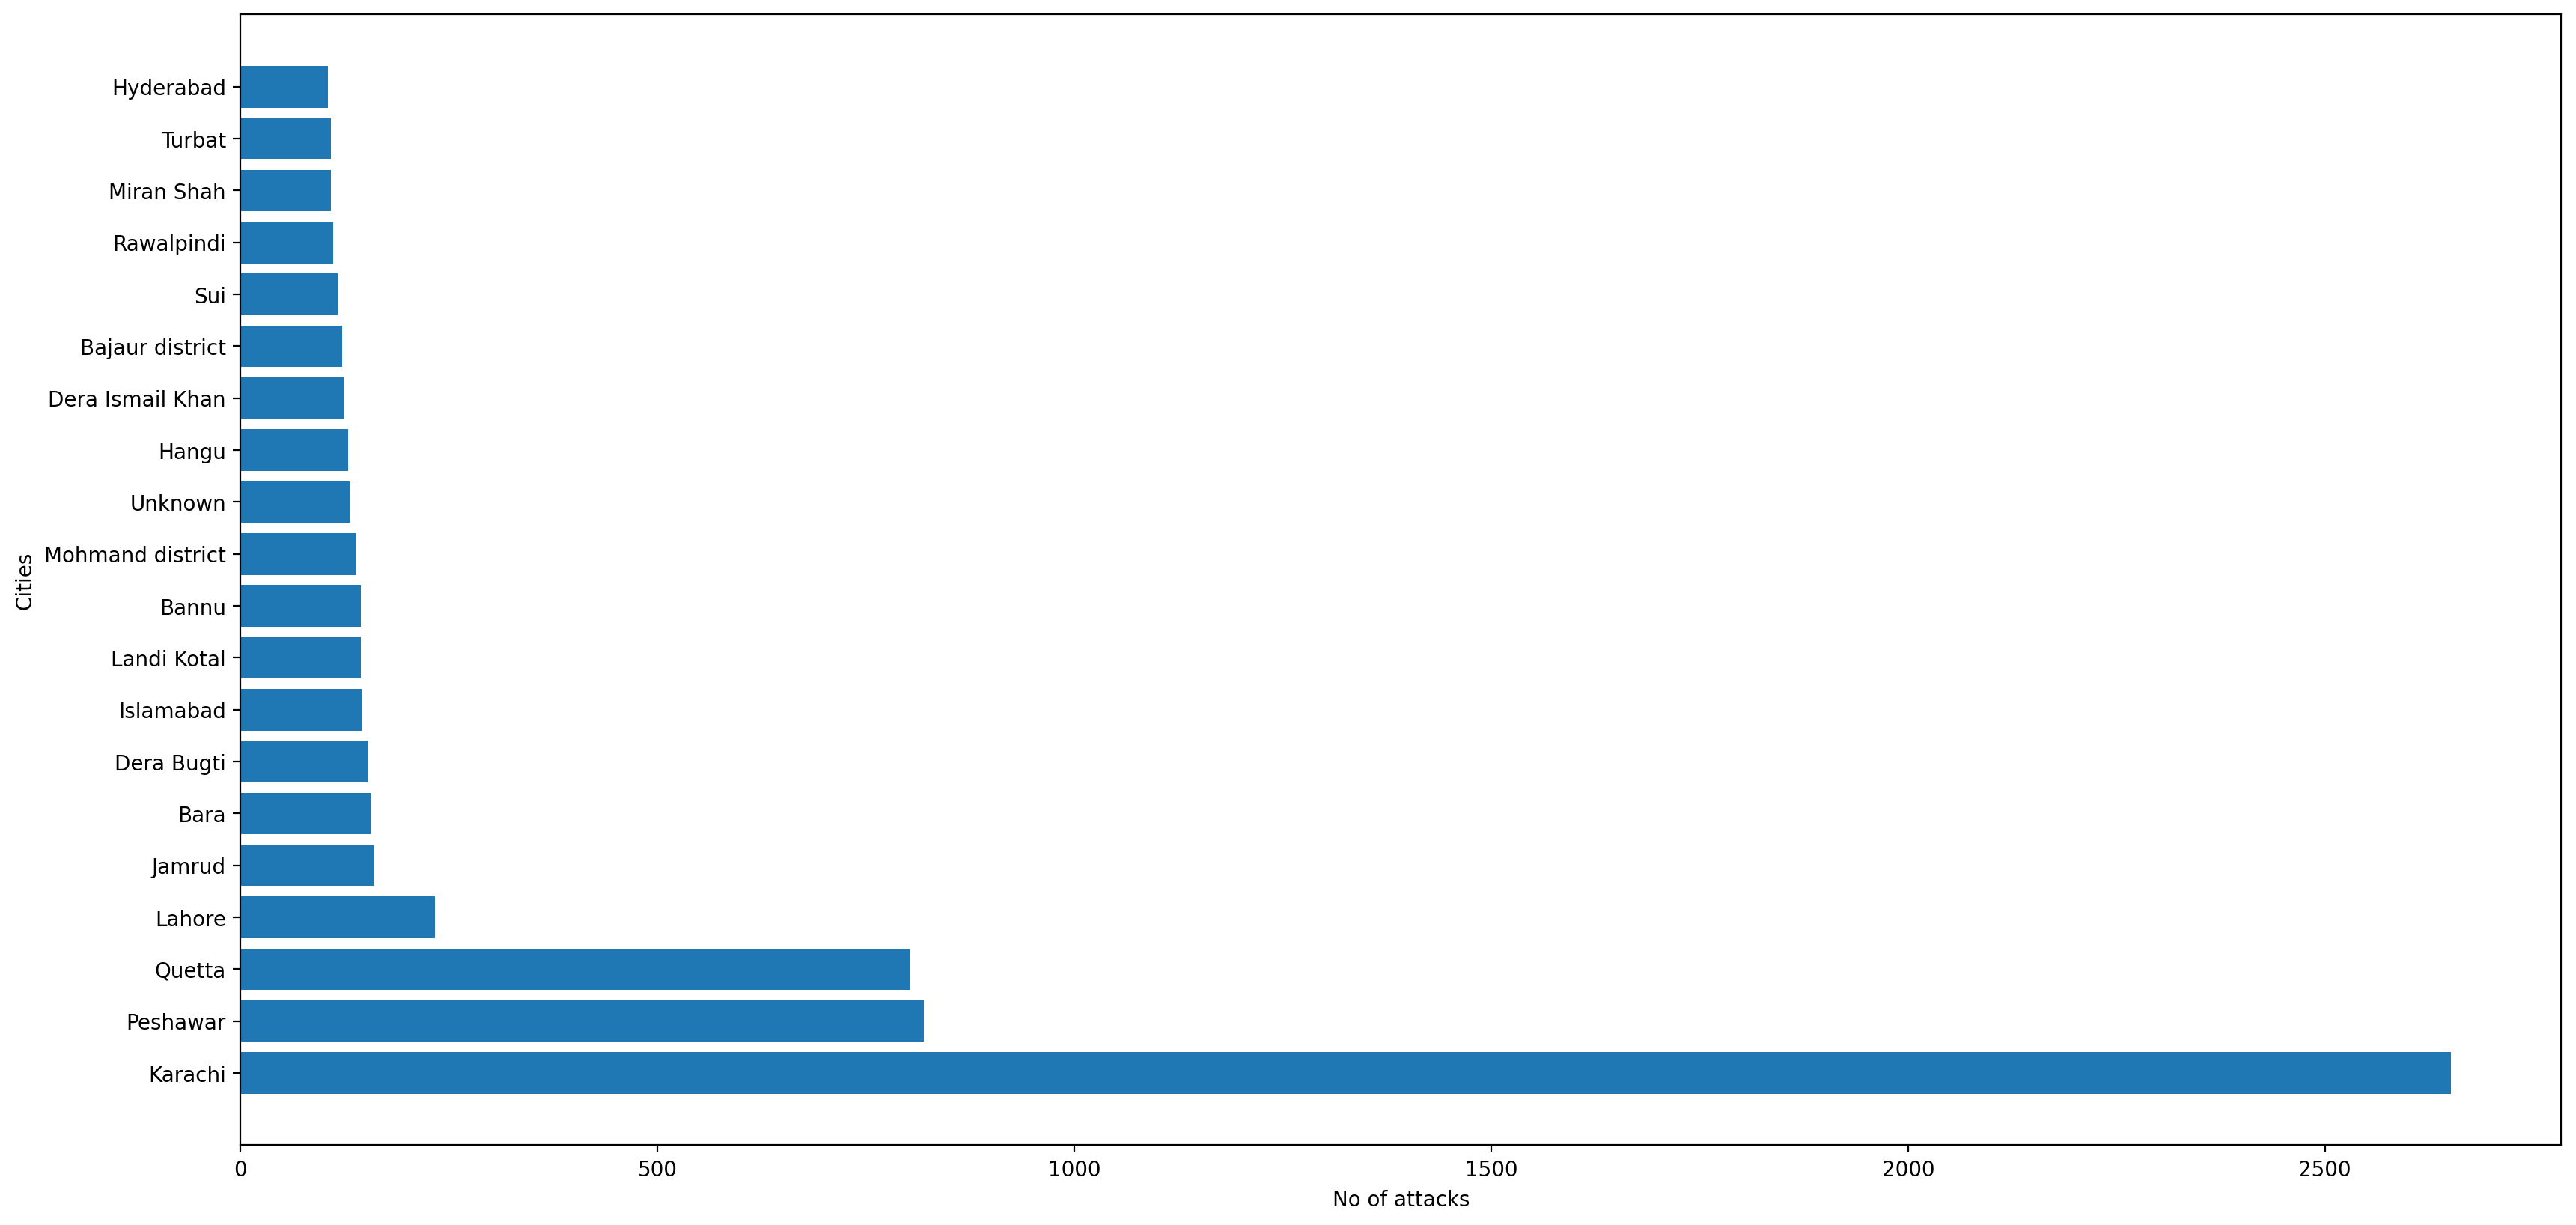

In [23]:
freq_cities_pakistan = {}
for i in df_pakistan['city']:
    if i in freq_cities_pakistan:
        freq_cities_pakistan[i] +=1
    else:
        freq_cities_pakistan[i] = 1

freq_cities_pakistan = dict(sorted(freq_cities_pakistan.items(), key = itemgetter(1), reverse = True)[:20])
keys = freq_cities_pakistan.keys()
keys = list(keys)
values = freq_cities_pakistan.values()
values = list(values)
plt.figure(figsize=(20, 10),dpi = 200)
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Cities')

Top three effected cities are
1. Karachi
2. Peshawar
3. Quetta

Text(0, 0.5, 'Attack Types')

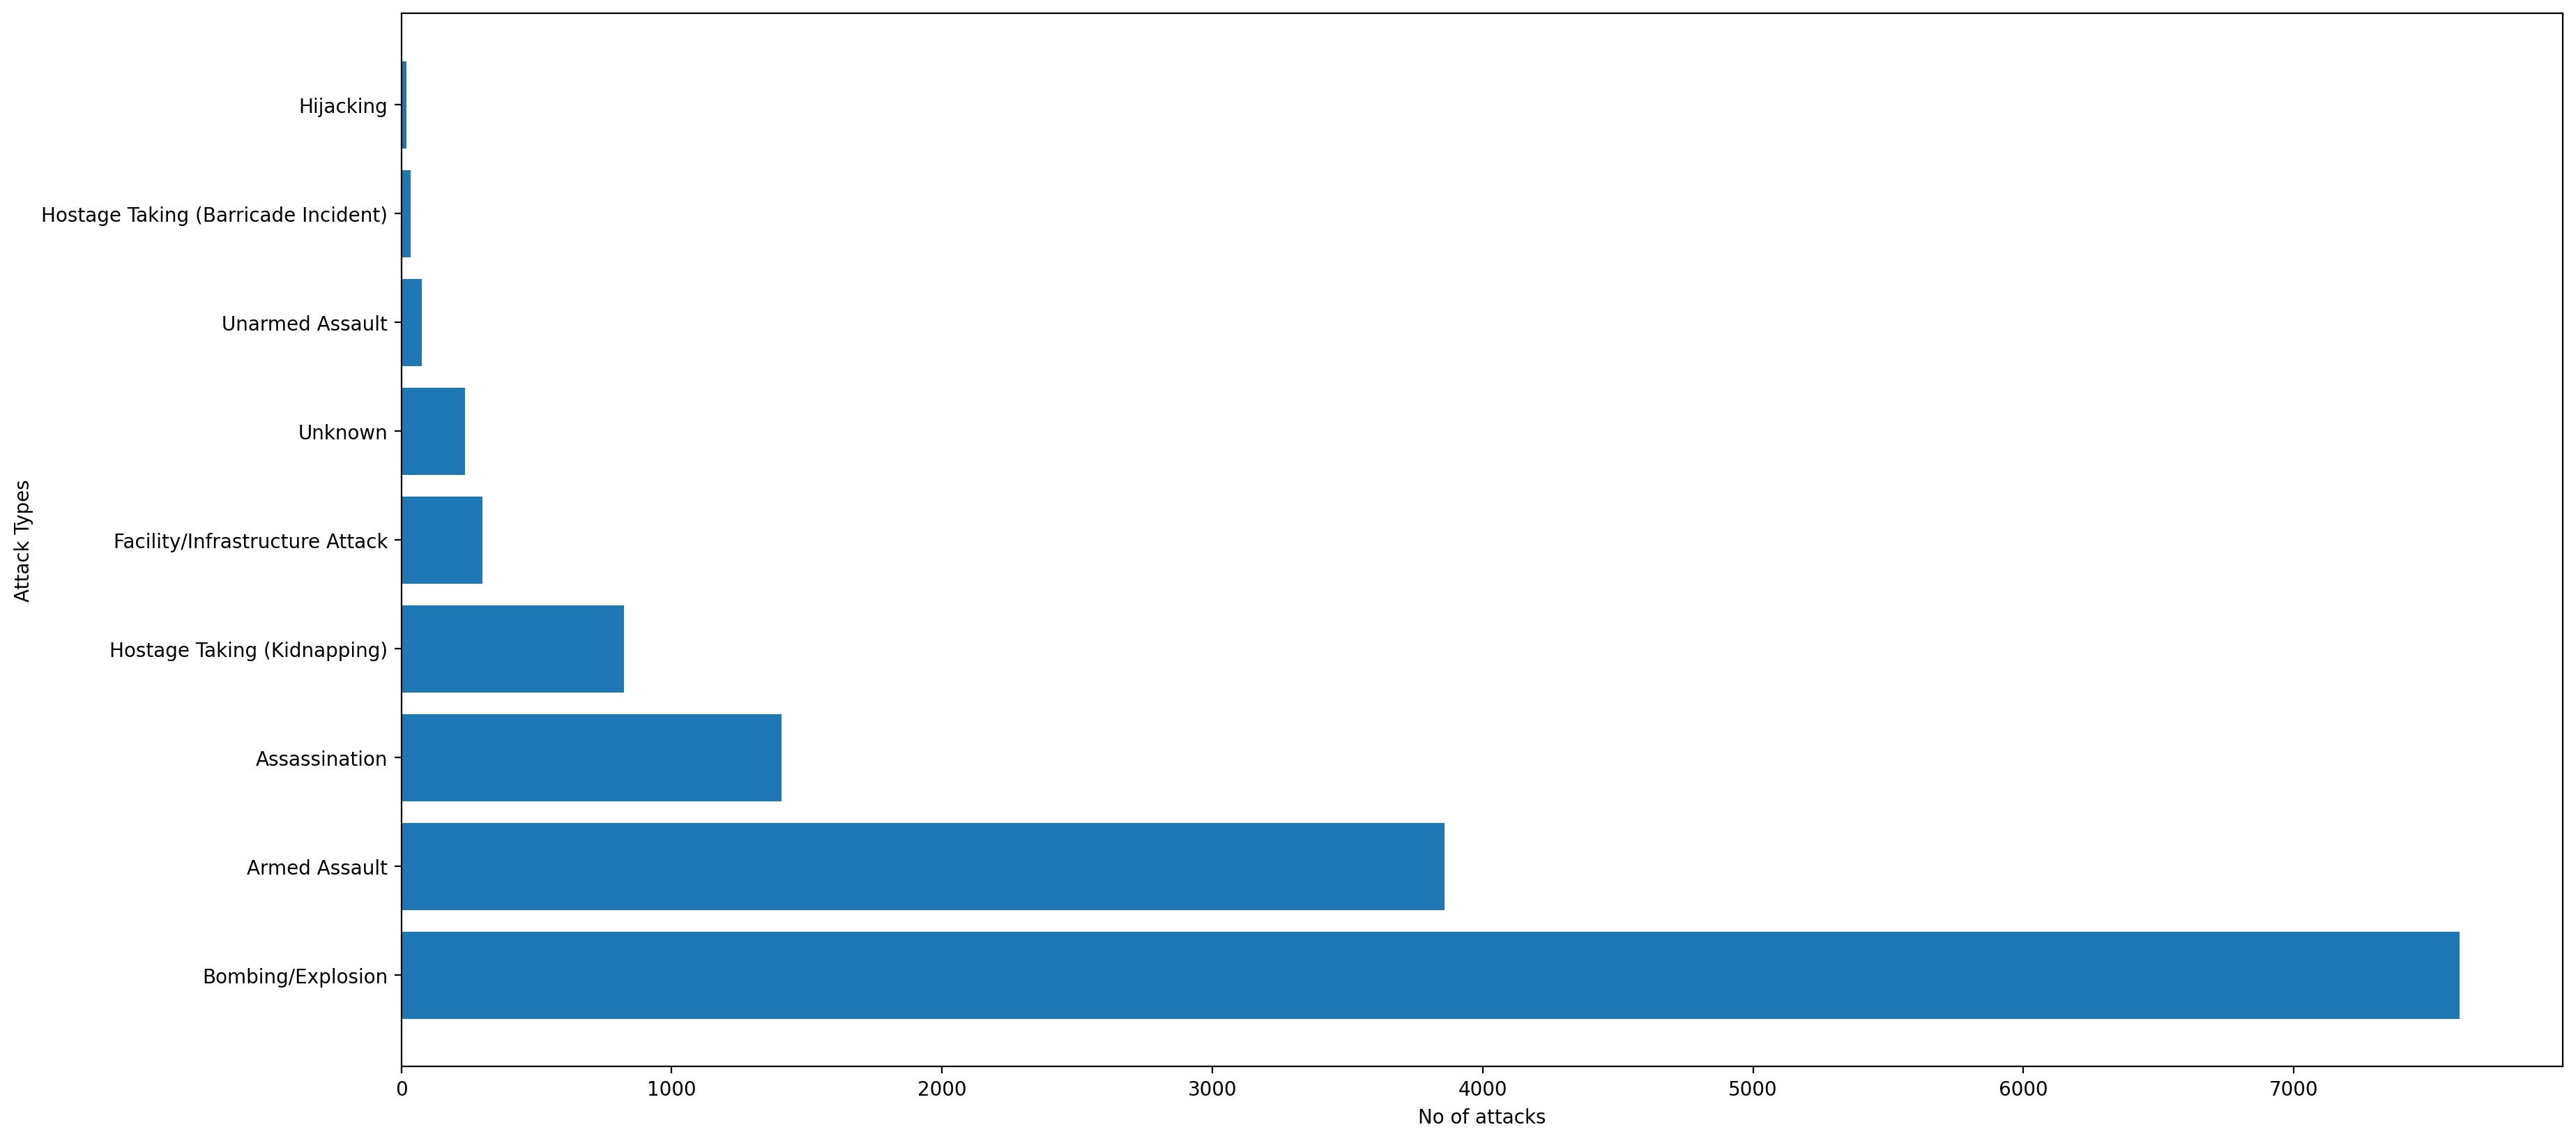

In [31]:
freq_attacks_pakistan = {}
for i in df_pakistan['attacktype1_txt']:
    if i in freq_attacks_pakistan:
        freq_attacks_pakistan[i] +=1
    else:
        freq_attacks_pakistan[i] = 1

freq_attacks_pakistan = dict(sorted(freq_attacks_pakistan.items(), key = itemgetter(1), reverse = True)[:20])
keys = freq_attacks_pakistan.keys()
keys = list(keys)
values = freq_attacks_pakistan.values()
values = list(values)
plt.figure(figsize=(20, 10),dpi = 200)
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Attack Types')

Text(0, 0.5, 'Target types')

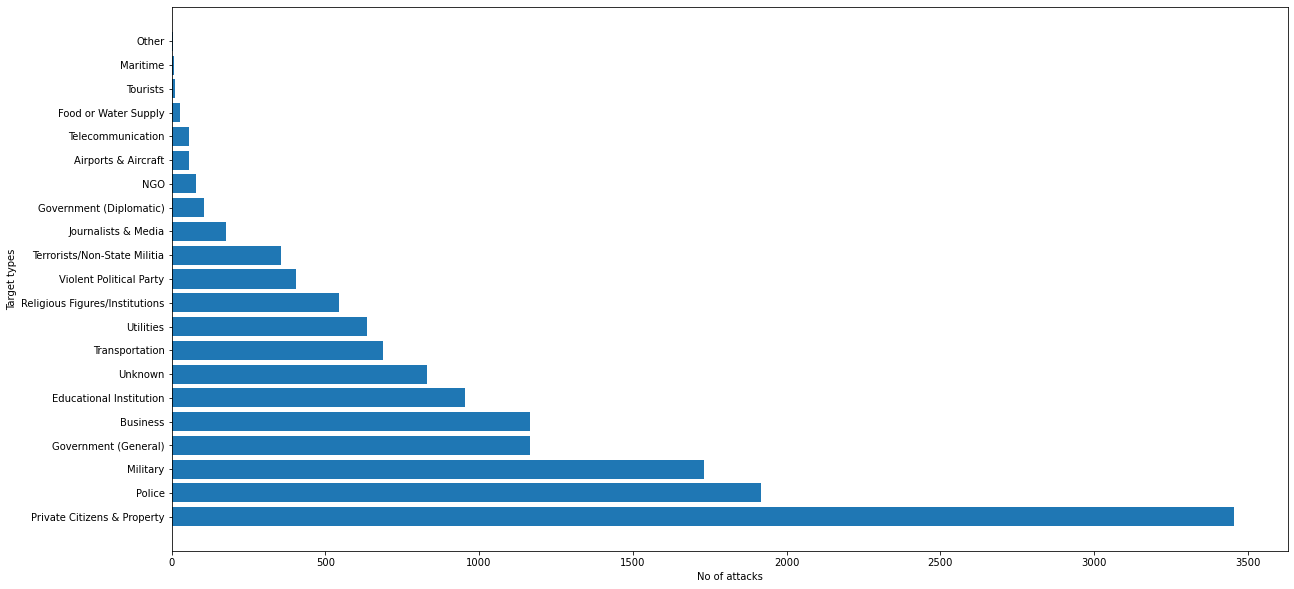

In [32]:
freq_targets_pakistan = {}
for i in df_pakistan['targtype1_txt']:
    if i in freq_targets_pakistan:
        freq_targets_pakistan[i] +=1
    else:
        freq_targets_pakistan[i] = 1

freq_targets_pakistan = dict(sorted(freq_targets_pakistan.items(), key = itemgetter(1), reverse = True))
keys = freq_targets_pakistan.keys()
keys = list(keys)
values = freq_targets_pakistan.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Target types')

Text(0, 0.5, 'Terrorism attacks')

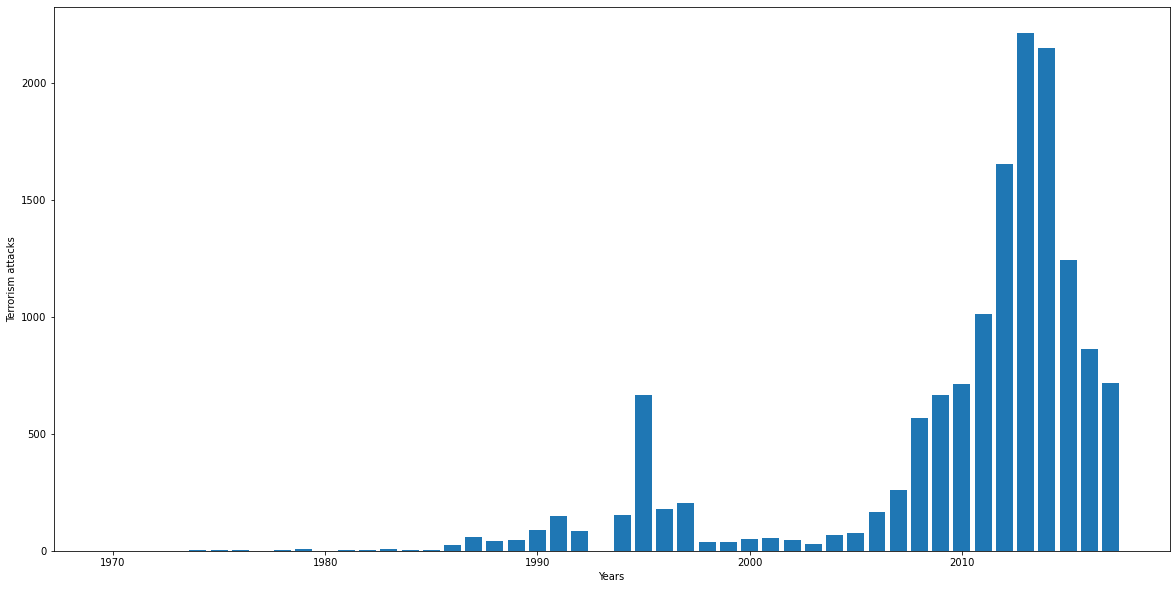

In [34]:
freq_year_pakistan = {}
for i in df_pakistan['iyear']:
    if i in freq_year_pakistan:
        freq_year_pakistan[i] +=1
    else:
        freq_year_pakistan[i] = 1

#freq_targets_pakistan = dict(sorted(freq_targets_pakistan.items(), key = itemgetter(1), reverse = True))
keys = freq_year_pakistan.keys()
keys = list(keys)
values = freq_year_pakistan.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.bar(keys, values)
plt.xlabel('Years')
plt.ylabel('Terrorism attacks')

Text(0, 0.5, 'Weapon types')

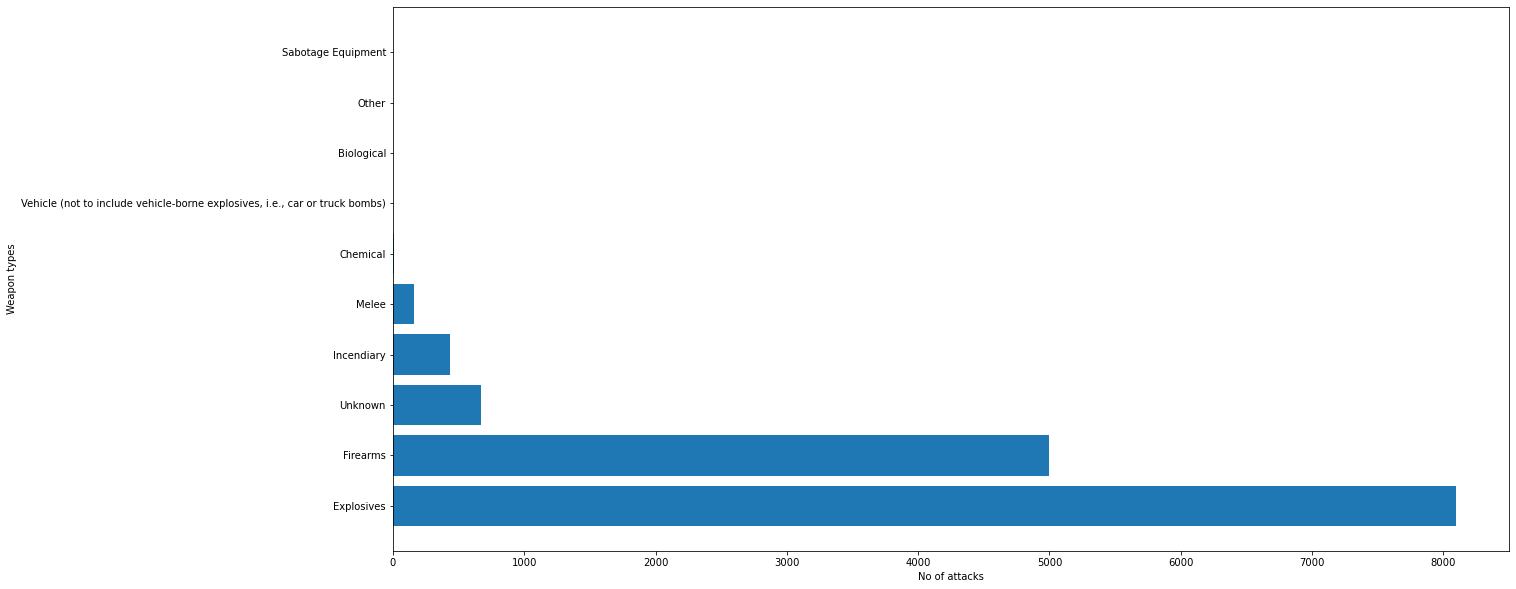

In [36]:
freq_weapon_pakistan = {}
for i in df_pakistan['weaptype1_txt']:
    if i in freq_weapon_pakistan:
        freq_weapon_pakistan[i] +=1
    else:
        freq_weapon_pakistan[i] = 1

freq_weapon_pakistan = dict(sorted(freq_weapon_pakistan.items(), key = itemgetter(1), reverse = True))
keys = freq_weapon_pakistan.keys()
keys = list(keys)
values = freq_weapon_pakistan.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Weapon types')

In [92]:
freq_success = {}
for i in df_pakistan['success']:
    if i in freq_success:
        freq_success[i] +=1
    else:
        freq_success[i] = 1

freq_suicide = {}
for i in df_pakistan['suicide']:
    if i in freq_suicide:
        freq_suicide[i] +=1
    else:
        freq_suicide[i] = 1

print('The total number of success and failed attacks are:')
print(freq_success)
print('The total number of suicide attempts are:')
print(freq_suicide)

The total number of success and failed attacks are:
{1: 12589, 0: 1768}
The total number of suicide attempts are:
{0: 13846, 1: 511}


Top country Pakistan...

In [4]:
df_india = df_type1.loc[((df_type1['country_txt'] == 'India'))]
df_afghanistan = df_type1.loc[((df_type1['country_txt'] == 'Afghanistan'))]

### India

In [88]:
df_india.head(2)

,iyear,country,country_txt,region,region_txt,city,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,weaptype1,weaptype1_txt
1186,1972,92,India,6,South Asia,New Delhi,1,0,4,Hijacking,6,Airports & Aircraft,6,Explosives
2764,1975,92,India,6,South Asia,Samastipur,1,0,3,Bombing/Explosion,2,Government (General),6,Explosives


Text(0, 0.5, 'Cities')

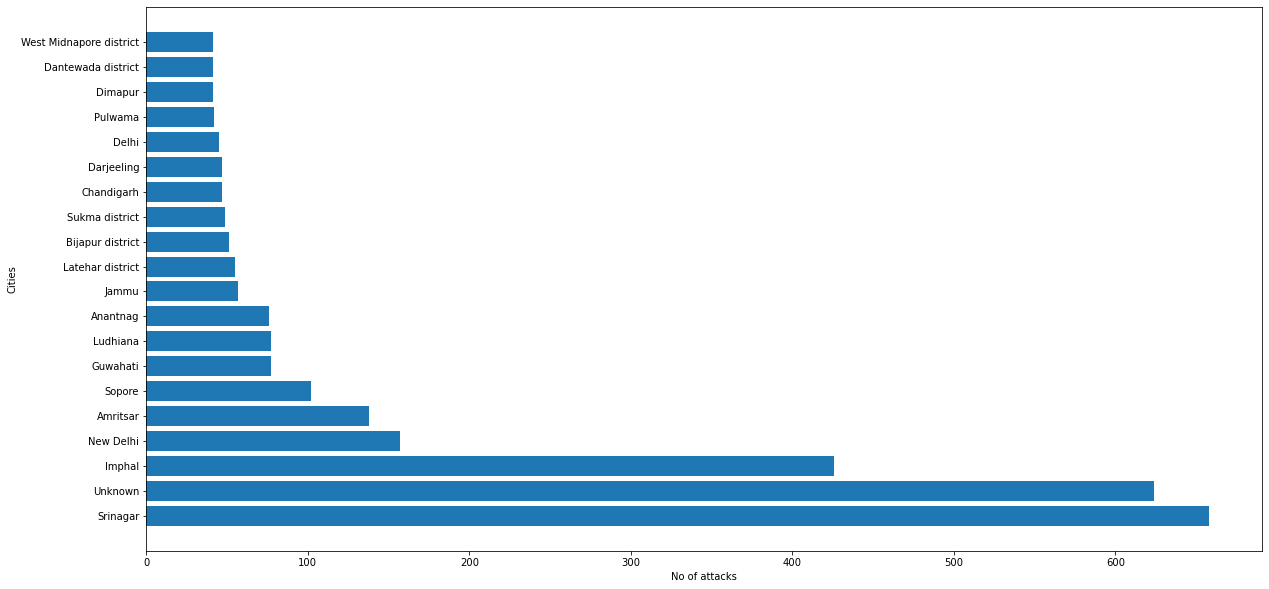

In [39]:
freq_indian_cities = {}
for i in df_india['city']:
    if i in freq_indian_cities:
        freq_indian_cities[i] +=1
    else:
        freq_indian_cities[i] = 1

freq_indian_cities = dict(sorted(freq_indian_cities.items(), key = itemgetter(1), reverse = True)[:20])
keys = freq_indian_cities.keys()
keys = list(keys)
values = freq_indian_cities.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Cities')

Text(0, 0.5, 'Attack types')

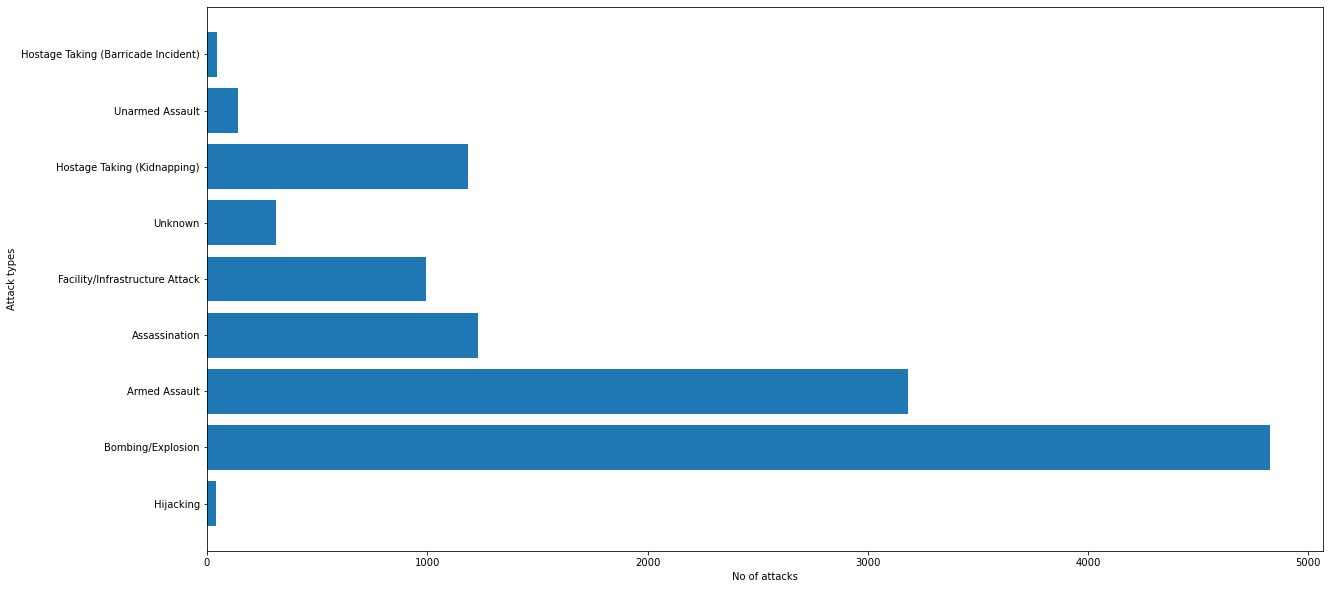

In [40]:
freq_attack_india = {}
for i in df_india['attacktype1_txt']:
    if i in freq_attack_india:
        freq_attack_india[i] +=1
    else:
        freq_attack_india[i] = 1

#freq_weapon_pakistan = dict(sorted(freq_weapon_pakistan.items(), key = itemgetter(1), reverse = True)[:20])
keys = freq_attack_india.keys()
keys = list(keys)
values = freq_attack_india.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Attack types')

Text(0, 0.5, 'Target types')

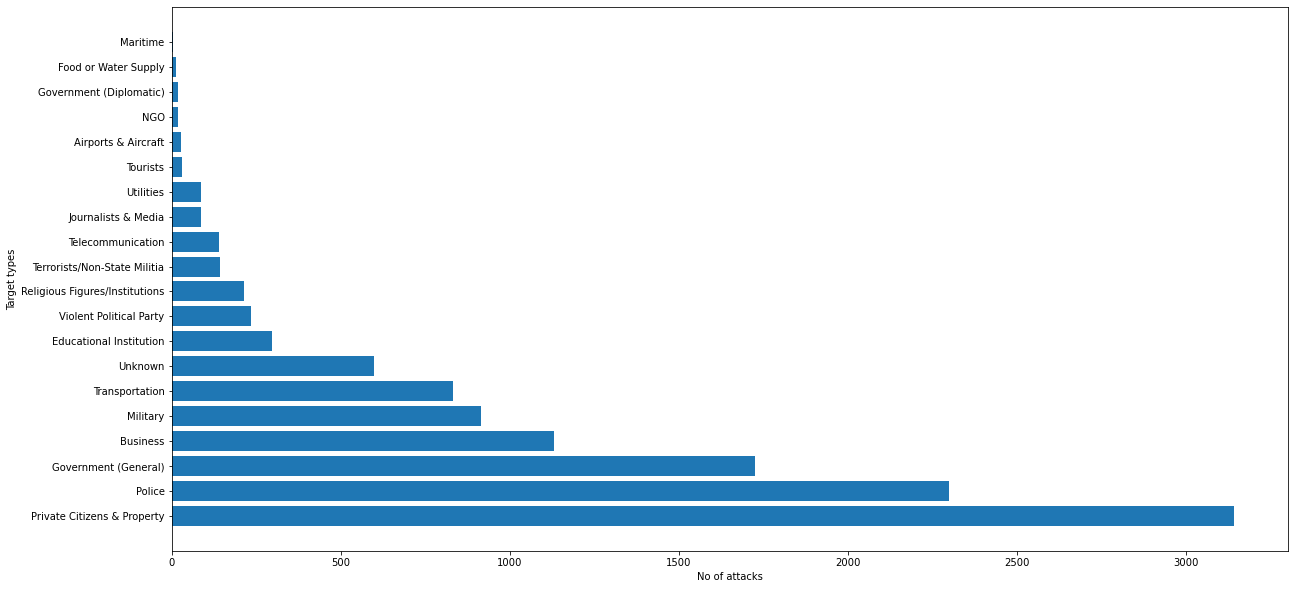

In [41]:
freq_target_india = {}
for i in df_india['targtype1_txt']:
    if i in freq_target_india:
        freq_target_india[i] +=1
    else:
        freq_target_india[i] = 1

freq_target_india = dict(sorted(freq_target_india.items(), key = itemgetter(1), reverse = True)[:20])
keys = freq_target_india.keys()
keys = list(keys)
values = freq_target_india.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Target types')

Text(0, 0.5, 'Weapon types')

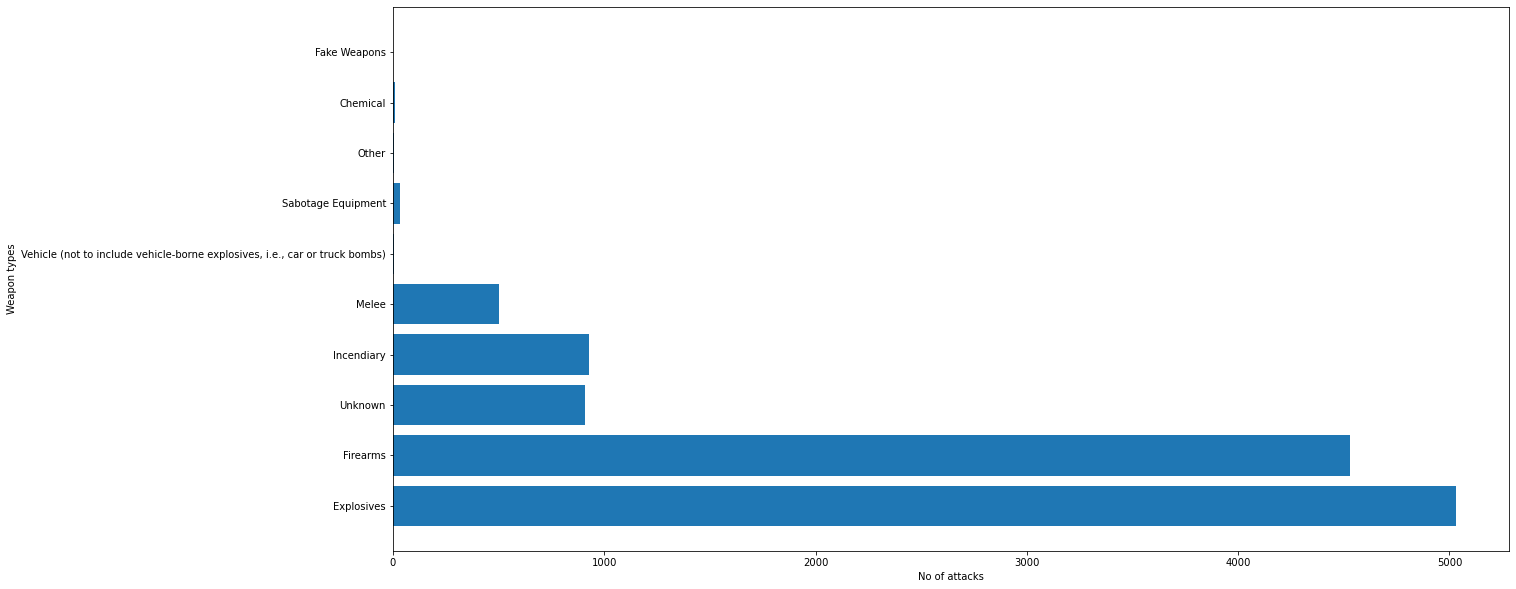

In [42]:
freq_weapon_india = {}
for i in df_india['weaptype1_txt']:
    if i in freq_weapon_india:
        freq_weapon_india[i] +=1
    else:
        freq_weapon_india[i] = 1

#freq_target_india = dict(sorted(freq_target_india.items(), key = itemgetter(1), reverse = True)[:20])
keys = freq_weapon_india.keys()
keys = list(keys)
values = freq_weapon_india.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Weapon types')

Text(0, 0.5, 'Terrorism attacks')

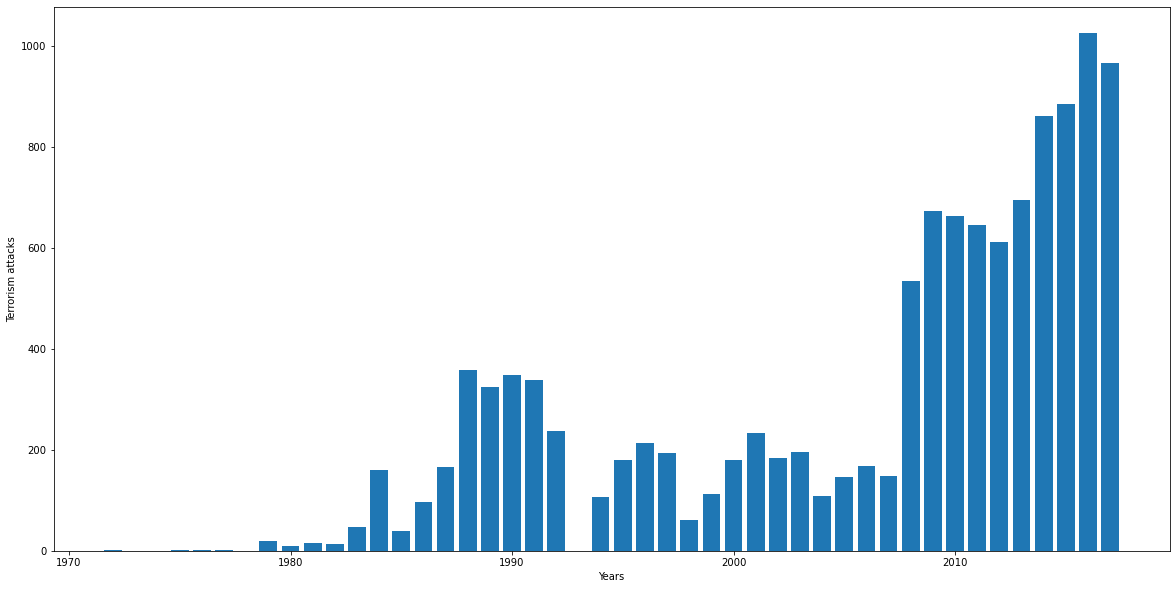

In [48]:
freq_year_india = {}
for i in df_india['iyear']:
    if i in freq_year_india:
        freq_year_india[i] +=1
    else:
        freq_year_india[i] = 1

#freq_target_india = dict(sorted(freq_target_india.items(), key = itemgetter(1), reverse = True)[:20])
keys = freq_year_india.keys()
keys = list(keys)
values = freq_year_india.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.bar(keys, values)
plt.xlabel('Years')
plt.ylabel('Terrorism attacks')

In [45]:
freq_success = {}
for i in df_india['success']:
    if i in freq_success:
        freq_success[i] +=1
    else:
        freq_success[i] = 1

freq_suicide = {}
for i in df_india['suicide']:
    if i in freq_suicide:
        freq_suicide[i] +=1
    else:
        freq_suicide[i] = 1

print('The total number of success and failed attacks are:')
print(freq_success)
print('The total number of suicide attempts are:')
print(freq_suicide)

The total number of success and failed attacks are:
{1: 10280, 0: 1680}
The total number of suicide attempts are:
{0: 11900, 1: 60}


### Afghanistan

Text(0, 0.5, 'Cities')

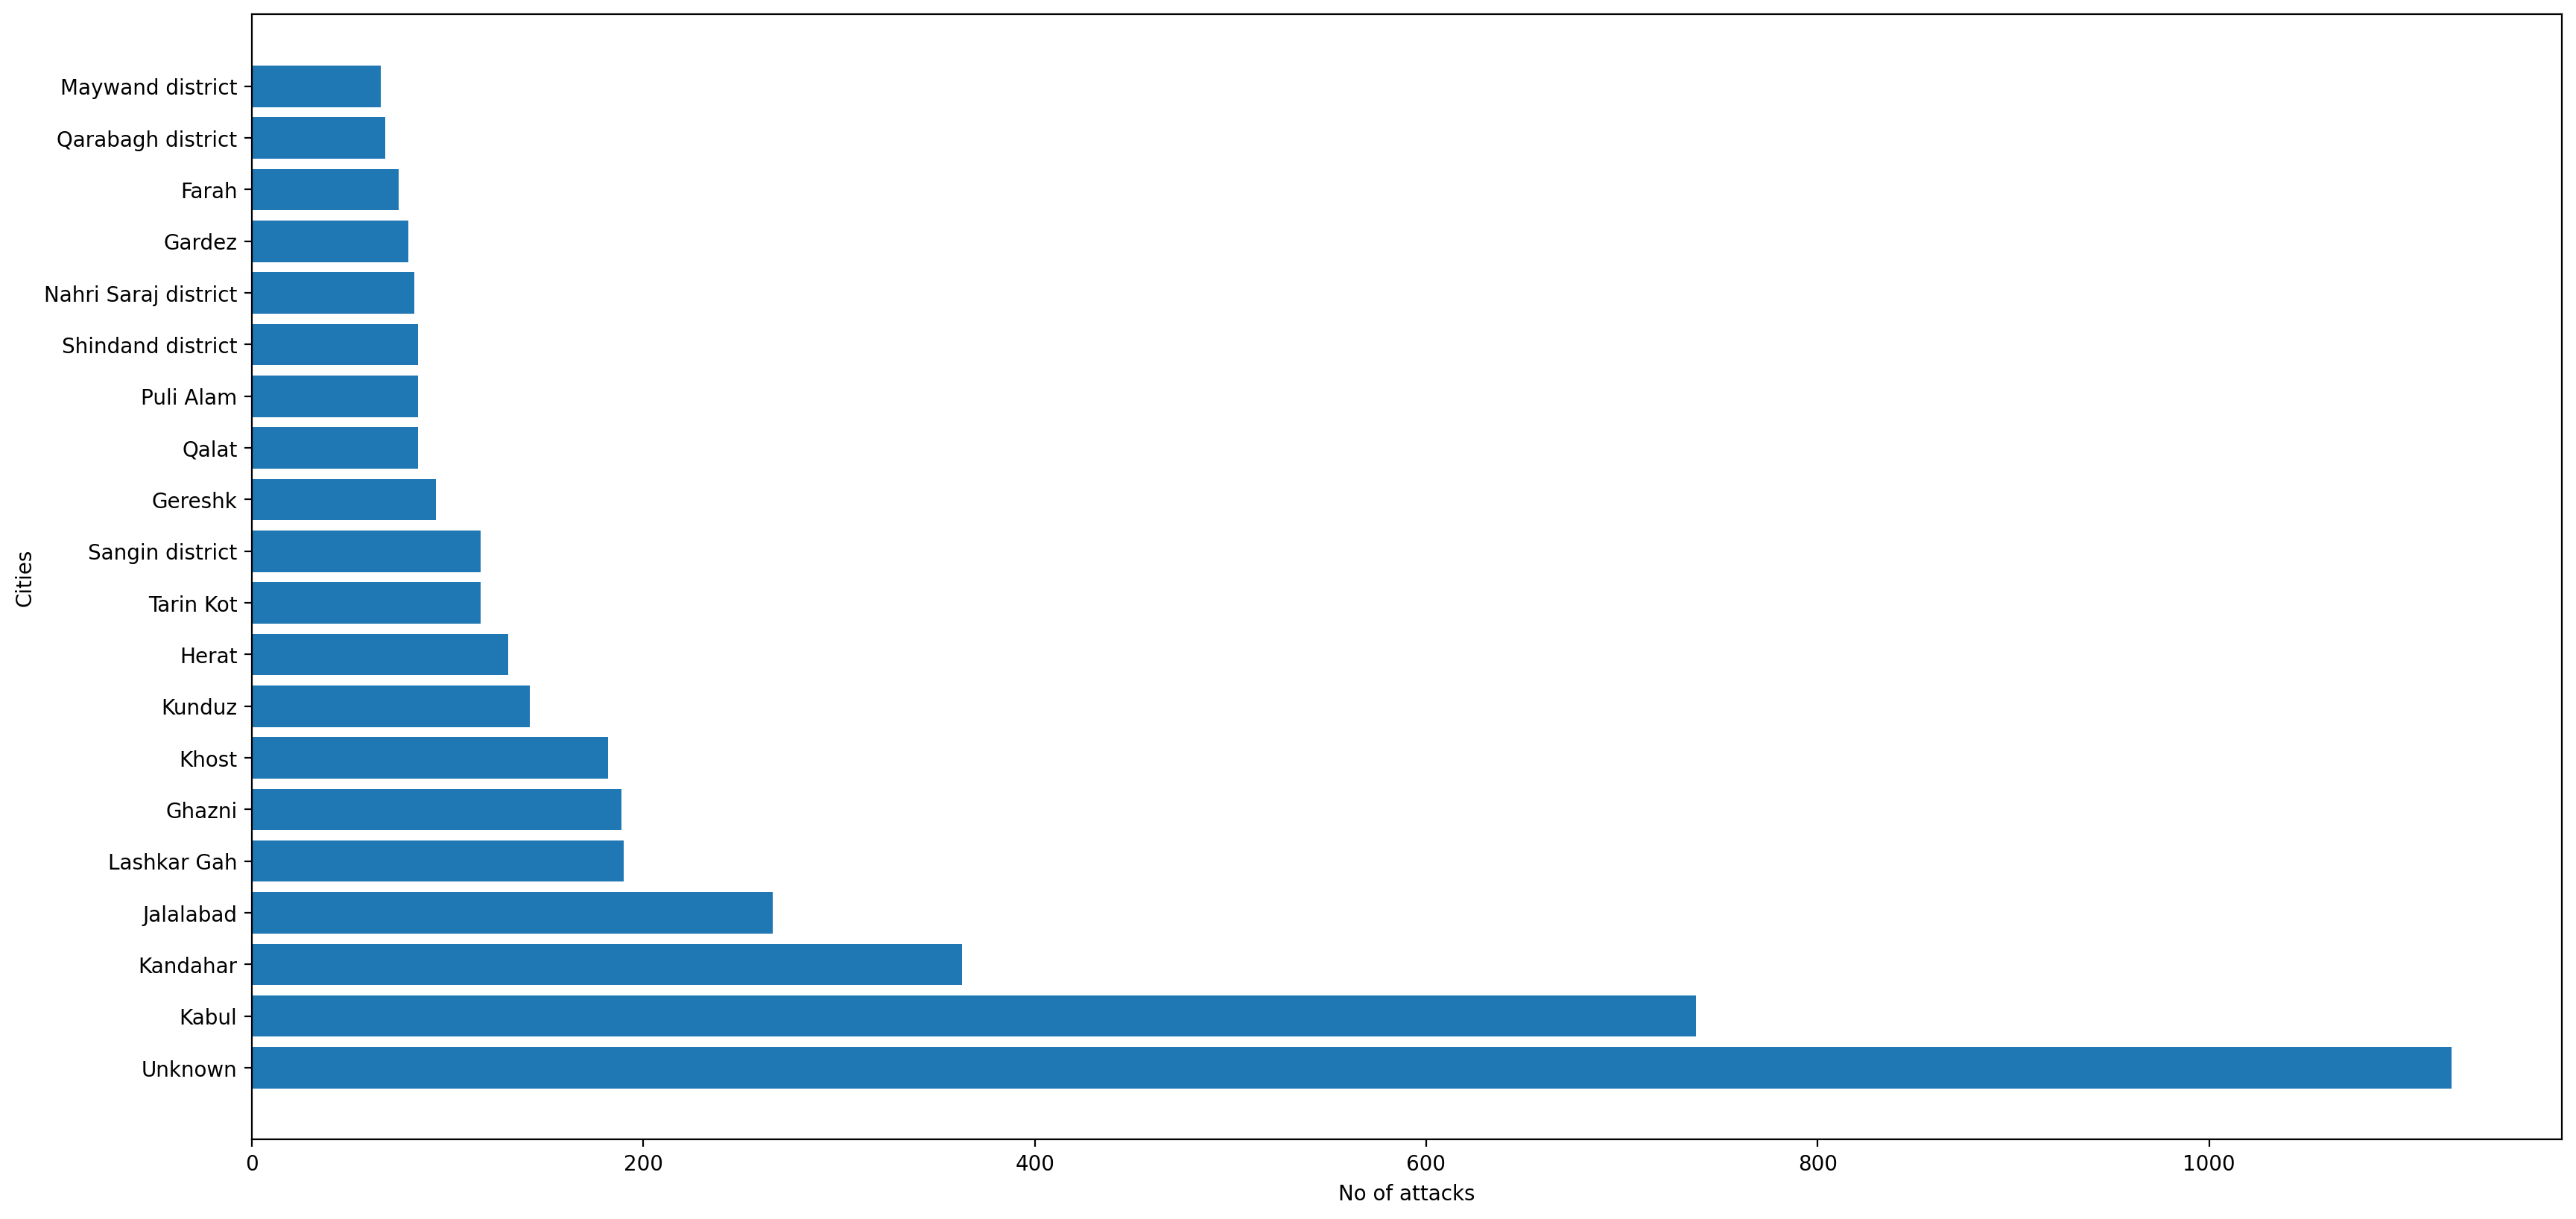

In [30]:
freq_cities_afghan = {}
for i in df_afghanistan['city']:
    if i in freq_cities_afghan:
        freq_cities_afghan[i] +=1
    else:
        freq_cities_afghan[i] = 1

freq_cities_afghan = dict(sorted(freq_cities_afghan.items(), key = itemgetter(1), reverse = True)[:20])
keys = freq_cities_afghan.keys()
keys = list(keys)
values = freq_cities_afghan.values()
values = list(values)
plt.figure(figsize=(20, 10),dpi = 200)
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Cities')

Text(0, 0.5, 'Attack types')

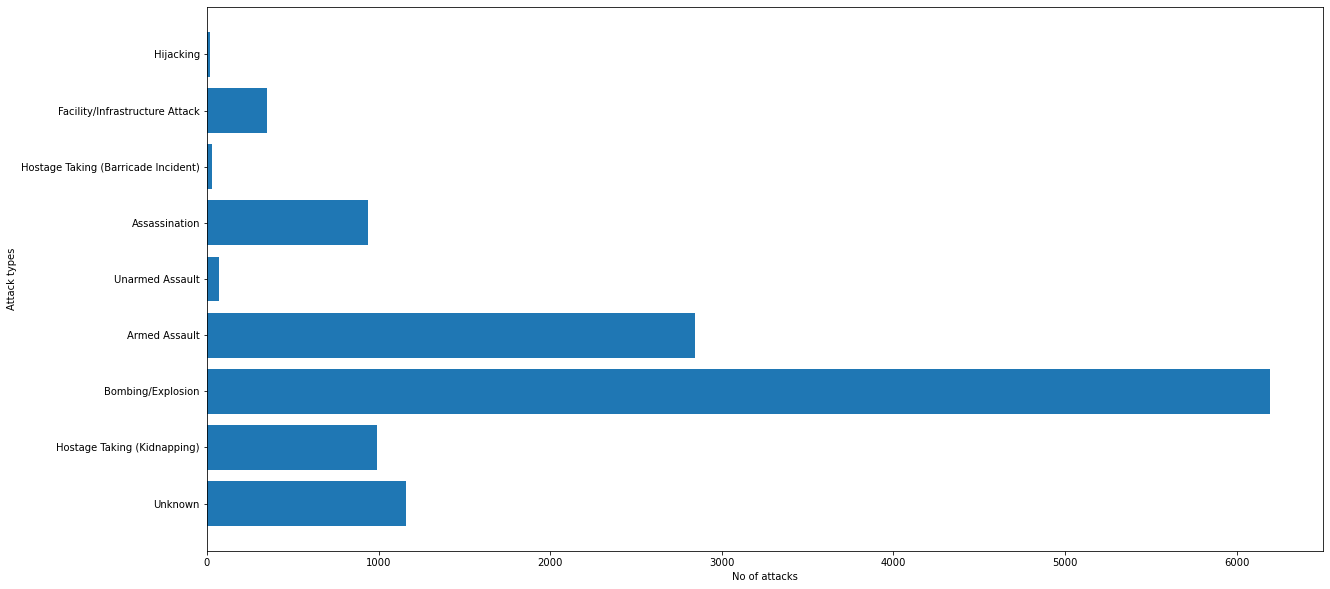

In [33]:
freq_attack_cities = {}
for i in df_afghanistan['attacktype1_txt']:
    if i in freq_attack_cities:
        freq_attack_cities[i] +=1
    else:
        freq_attack_cities[i] = 1

#freq_afghan_cities = dict(sorted(freq_afghan_cities.items(), key = itemgetter(1), reverse = True)[:20])
keys = freq_attack_cities.keys()
keys = list(keys)
values = freq_attack_cities.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Attack types')

Text(0, 0.5, 'Targets')

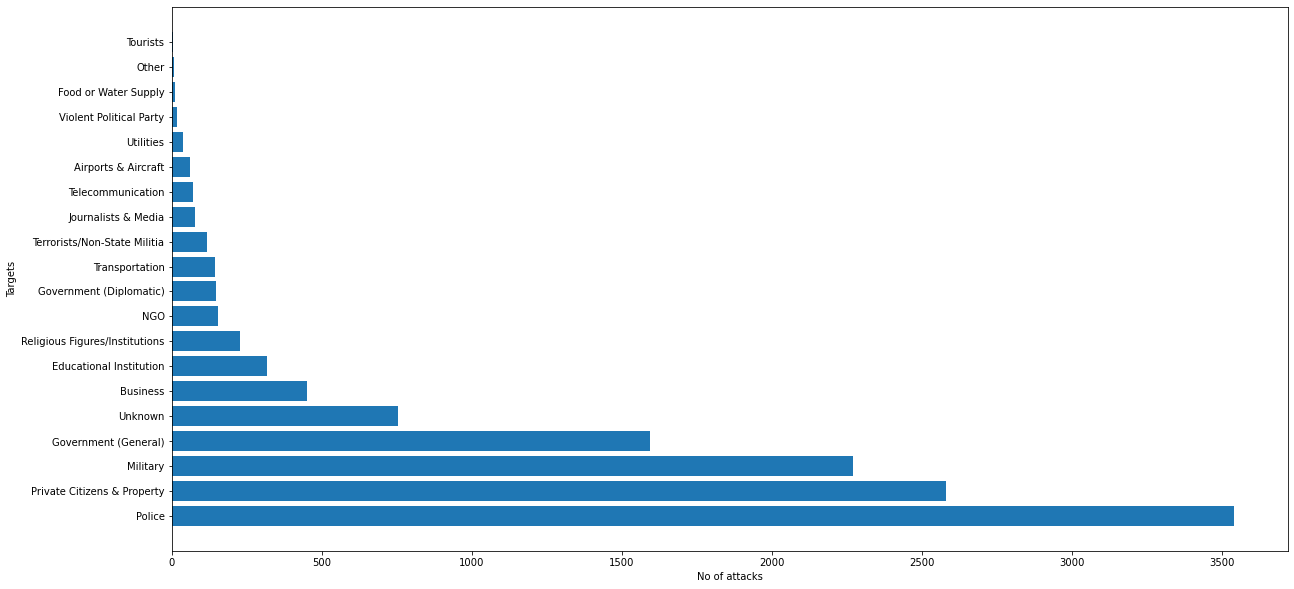

In [34]:
freq_target_cities = {}
for i in df_afghanistan['targtype1_txt']:
    if i in freq_target_cities:
        freq_target_cities[i] +=1
    else:
        freq_target_cities[i] = 1

freq_target_cities = dict(sorted(freq_target_cities.items(), key = itemgetter(1), reverse = True))
keys = freq_target_cities.keys()
keys = list(keys)
values = freq_target_cities.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Targets')

Text(0, 0.5, 'Types of weapons')

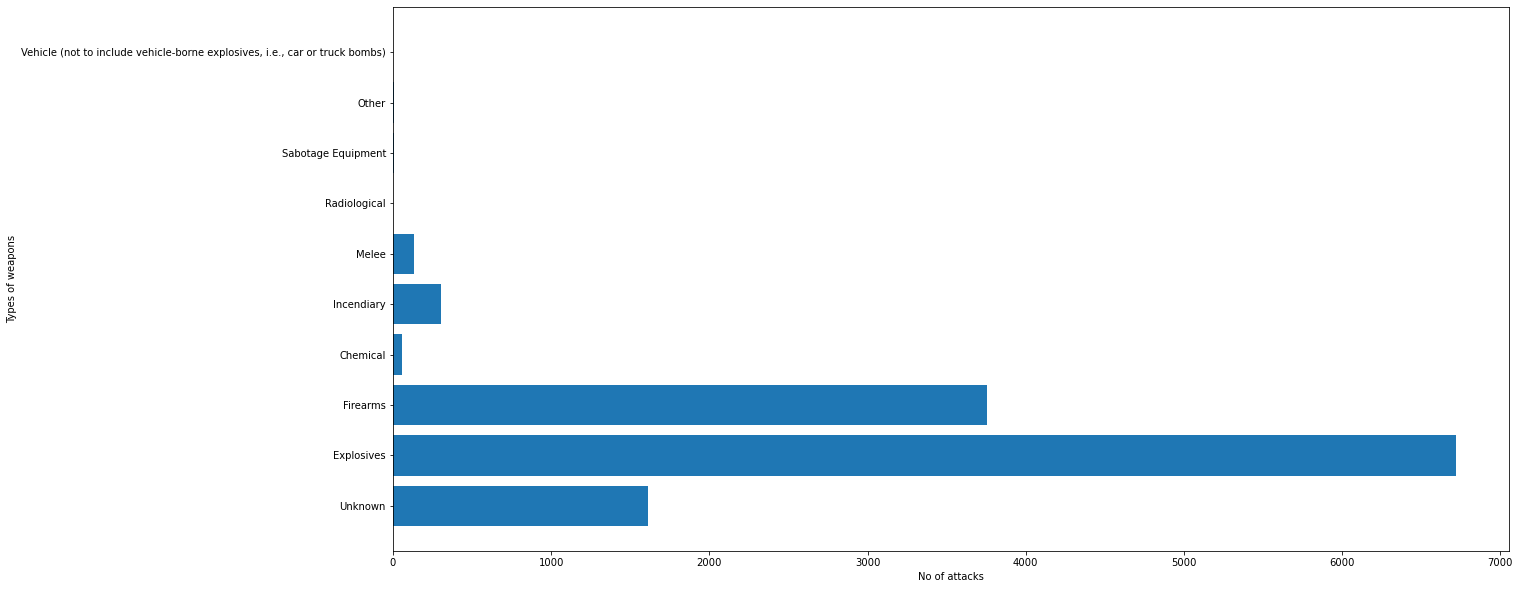

In [35]:
freq_weapon_cities = {}
for i in df_afghanistan['weaptype1_txt']:
    if i in freq_weapon_cities:
        freq_weapon_cities[i] +=1
    else:
        freq_weapon_cities[i] = 1

#freq_target_cities = dict(sorted(freq_target_cities.items(), key = itemgetter(1), reverse = True))
keys = freq_weapon_cities.keys()
keys = list(keys)
values = freq_weapon_cities.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.barh(keys, values)
plt.xlabel('No of attacks')
plt.ylabel('Types of weapons')

Text(0, 0.5, 'No of attacks')

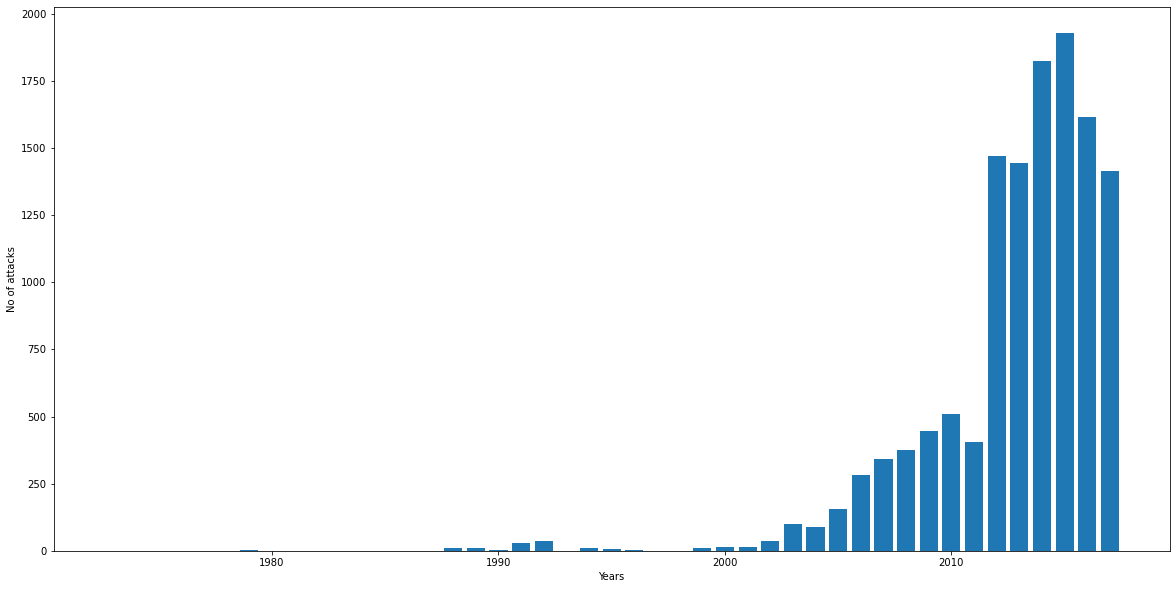

In [36]:
freq_year = {}
for i in df_afghanistan['iyear']:
    if i in freq_year:
        freq_year[i] +=1
    else:
        freq_year[i] = 1

#freq_target_cities = dict(sorted(freq_target_cities.items(), key = itemgetter(1), reverse = True))
keys = freq_year.keys()
keys = list(keys)
values = freq_year.values()
values = list(values)
plt.figure(figsize=(20, 10))
plt.bar(keys, values)
plt.xlabel('Years')
plt.ylabel('No of attacks')

### Findings

1. Top victims of terrorism are
    1. Pakistan
    2. India
    3. Afghanistan

#### Pakistan
1. The most effected city is Karachi with more than 2500 incidents.
2. Most of the terrorists attacks were explosives followed by armed assault and assassination.
3. The attacks were made on private citizen and property followed by attacks on police and military.
4. The attacks graduaaly intensified after 2000s and were at peak in 2013 and 2014.

These kind of terrorist attacks costed Pakistan 1st place in South Asia in terms of terrorism.

#### India
1. The most effected city is Srinagar, Imphal and some unknown places.
2. Most of the terrorists attacks were explosives followed by armed assault and some unknown types.
3. The attacks were made on private citizen and property followed by attacks on police and government persons.
4. The attacks started after 1980 and were less than 400 till 2006, then in 2007 there was a high increase continued till 2017.

These kind of terrorist attacks costed India the 2nd country in South Asia in terms of terrorism.

#### Afghanistan
1. The most effected cities are some unknown places, Kabul and Kandahar.
2. Most of the terrorists attacks were explosives followed by armed assault and assassination.
3. The attacks were made on police, private citizen and property and military.
4. The attacks started after 2000 but boosted up after 2010. These attacks were at peak in 2014 and 2015.

These kind of terrorist costed Afghanistan the 3rd country in South Asia in terms of terrorism.


## Summary

So to summarize this, regions most effected by terrorism are Middle East & North African and South Asia. In middle east and north africa there is only one country Iraq which is the most effected country of terrorism and specifically its city Baghdad. In south asia there were three countries Pakistan, India and Afghanistan respectively. These attacks have damaged these countries and yet these countries are reaping the harvest of these horrible incidents.